# **1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# **2. Load Data**

In [31]:
df = pd.read_csv('./Dataset/home-credit-default-risk/application_train_drop.csv')
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  REG_REGION_NOT_WORK_REGION  \
0           24700.5  ...                           0   
1           35698.5  ...                           0   
2            6750.0  ...                           0   
3           29686.5  ...                           0   
4           21865.5  ...                           0   
...             ...  ...                         ...   
307506      27558.0  ...                           0   
307507      12001.5  ...                           0   
307508      29979.0  ...                           0   
307509      20205.0  ...                           0   
307510      49117.5  ...                           0   

       LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                      0   
...                            ...                    ...   
307506                           0                      0   
307507                           0                      0   
307508                           0                      0   
307509                           0                      1   
307510                           0                      0   

       REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                           0                       0  Business Entity Type 3   
1                           0                       0                  School   
2                           0                       0              Government   
3                           0                       0  Business Entity Type 3   
4                           1                       1                Religion   
...                       ...                     ...                     ...   
307506                      0                       0                Services   
307507                      0                       0                     XNA   
307508                      1                       1                  School   
307509                      1                       0  Busines

# **3. Exploratory Data Analysis**

## 3.1 Descriptive Statistics

### 3.1.1 General Information

In [5]:
df.shape

(307511, 45)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### 3.1.2 Data Types (Numerical & Non-Numerical Features)

#### 3.1.2.1 Numerical Features

In [3]:
num = list(df.select_dtypes(include='int'))
num

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

### 3.1.2.2 Non-Numerical Features

In [4]:
cat = list(df.select_dtypes(include='object'))
cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

<AxesSubplot: >

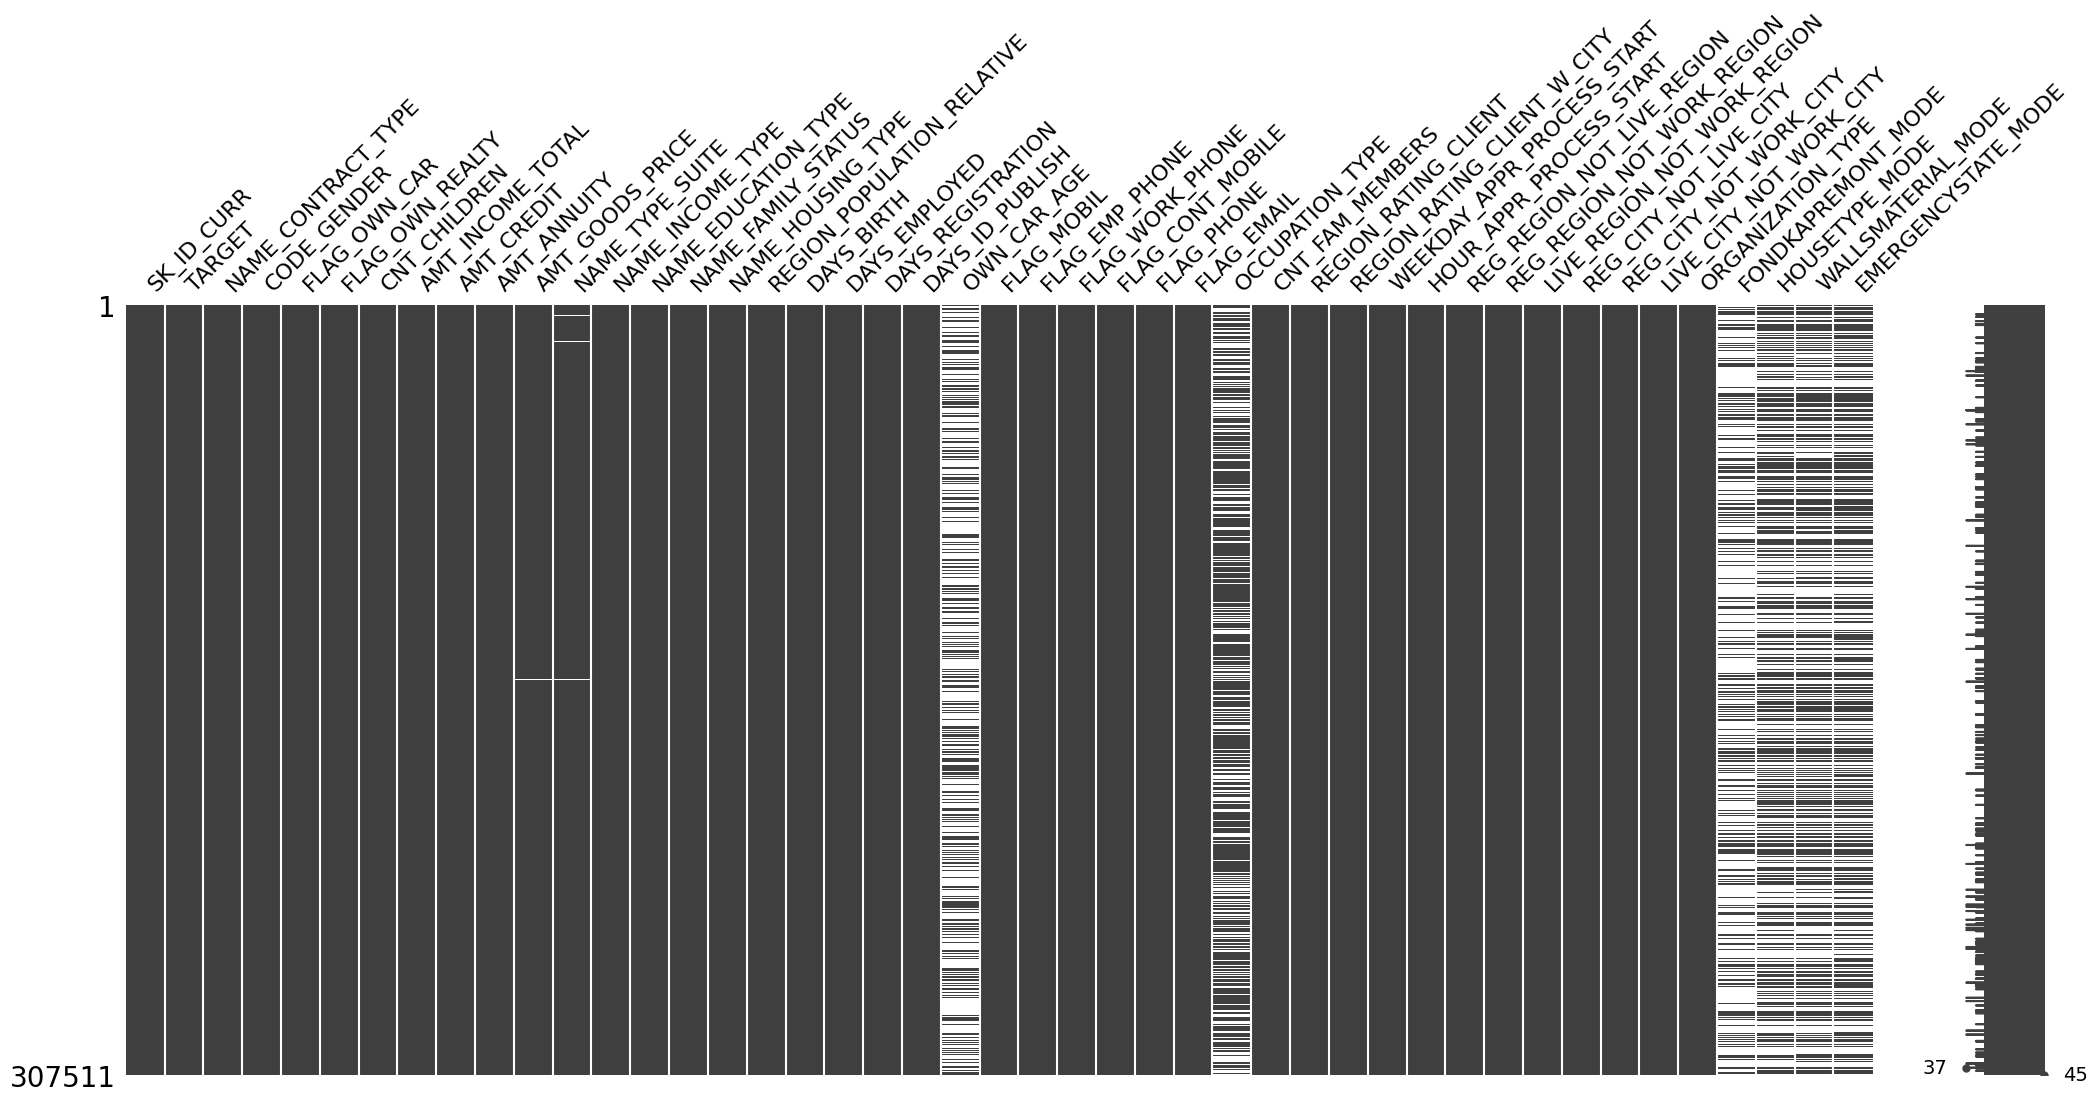

In [9]:
# Plot of Missing Values using matrix and heatmap missingno
import missingno as msno
msno.matrix(df)

<AxesSubplot: >

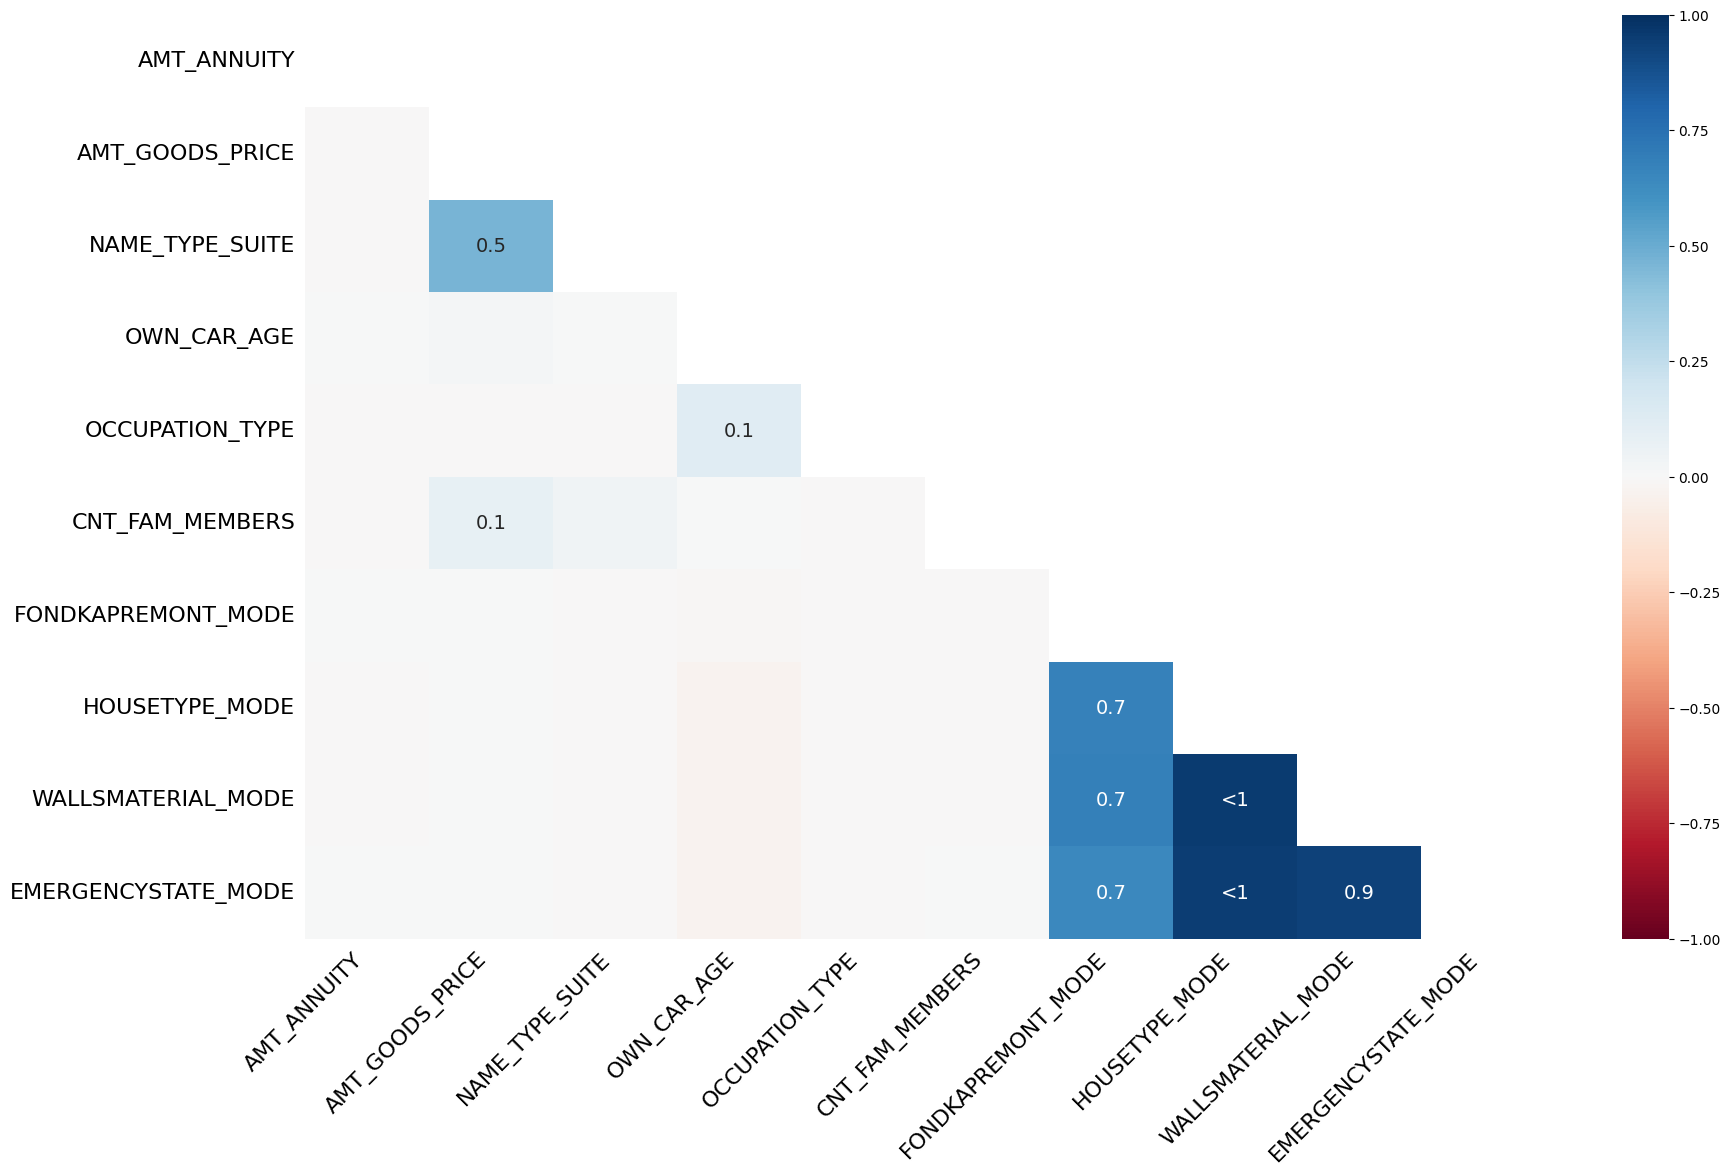

In [10]:
msno.heatmap(df)

### 3.1.3 Descriptive Statiscs of Numerical Features

In [11]:
df[num].describe()

SK_ID_CURR         TARGET   CNT_CHILDREN     DAYS_BIRTH  \
count  307511.000000  307511.000000  307511.000000  307511.000000   
mean   278180.518577       0.080729       0.417052  -16036.995067   
std    102790.175348       0.272419       0.722121    4363.988632   
min    100002.000000       0.000000       0.000000  -25229.000000   
25%    189145.500000       0.000000       0.000000  -19682.000000   
50%    278202.000000       0.000000       0.000000  -15750.000000   
75%    367142.500000       0.000000       1.000000  -12413.000000   
max    456255.000000       1.000000      19.000000   -7489.000000   

       DAYS_EMPLOYED  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count  307511.000000    307511.000000  307511.000000   307511.000000   
mean    63815.045904     -2994.202373       0.999997        0.819889   
std    141275.766519      1509.450419       0.001803        0.384280   
min    -17912.000000     -7197.000000       0.000000        0.000000   
25%     -2760.000000     -4299.000000       1.000000        1.000000   
50%     -1213.000000     -3254.000000       1.000000        1.000000   
75%      -289.000000     -1720.000000       1.000000        1.000000   
max    365243.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  ...     FLAG_EMAIL  \
count    307511.000000     307511.000000  ...  307511.000000   
mean          0.199368          0.998133  ...       0.056720   
std           0.399526          0.043164  ...       0.231307   
min           0.000000          0.000000  ...       0.000000   
25%           0.000000          1.000000  ...       0.000000   
50%           0.000000          1.000000  ...       0.000000   
75%           0.000000          1.000000  ...       0.000000   
max           1.000000          1.000000  ...       1.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         307511.000000                307511.000000   
mean               2.052463                     2.031521   
std                0.509034                     0.502737   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.265832                    0.122126   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  14.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               307511.000000                307511.000000   
mean                     0.050769                     0.040659   
std                      0.219526                     0.197499   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  
count           307511.000000           307511.000000            307511.000000  
mean                 0.078173                0.230454                 0.179555  
std                  0.268444                0.421124                 0.383817  
min                  0.000000                0.000000                 0.000000  
25%                  0.000000                0.000000         

**HASIL PENGAMATAN**<br>
<li>Jumlah maksimal anak dari customer adalah 19 sedangkan 75% data memiliki anak kurang dari sama dengan 1
<li>Terdapat data yg menunjukkan perbedaan alamat rumah sebenarnya dan contact address yg dapat menimbulkan pertanyaan
<li>Nilai maksimum hari klien saat mendapatkan pekerjaan adalah 365243. Data ini tidak masuk akal karena tidak mungkin angkanya > 0 dan jumlahnya sangat besar

### 3.1.4 Descriptive Statiscs of Non-Numerical Features

In [12]:
df[cat].describe()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

**HASIL PENGAMATAN**<br>
<li>Kolom yang memiliki unique values > 10 adalah occupation_type dan organization_type

In [13]:
print(df['OCCUPATION_TYPE'].unique())

['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']


In [14]:
print(df['ORGANIZATION_TYPE'].unique())

['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport: type 1' 'Industry: type 12' 'Mobile'
 'Trade: type 1' 'Industry: type 5' 'Industry: type 10' 'Legal Services'
 'Advertising' 'Trade: type 5' 'Cleaning' 'Industry: type 13'
 'Trade: type 4' 'Telecom' 'Industry: type 8' 'Realtor' 'Industry: type 6']


**HASIL PENGAMATAN**<br>
- Kolom OCCUPATION_TYPE 
    - Terdapat beberapa bidang atau kategori pekerjaan yg sama (akan digabung)
- Kolom ORGANIZATION_TYPE
    - Terdapat label yang terlalu banyak pada jenis organisasi tertentu (akan digabung)

## 3.2 Univariate Analysis

### 3.2.1 Numerical Features

#### 3.2.1.1 Boxplot

C:\Users\evind\AppData\Local\Temp\ipykernel_2744\2937388611.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\evind\AppData\Local\Temp\ipykernel_2744\2937388611.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\evind\AppData\Local\Temp\ipykernel_2744\2937388611.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\evind\AppData\Local\Temp\ipykernel_2744\2937388611.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\evind\AppData\Local\Temp\ipykernel_2744\2937388611.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to

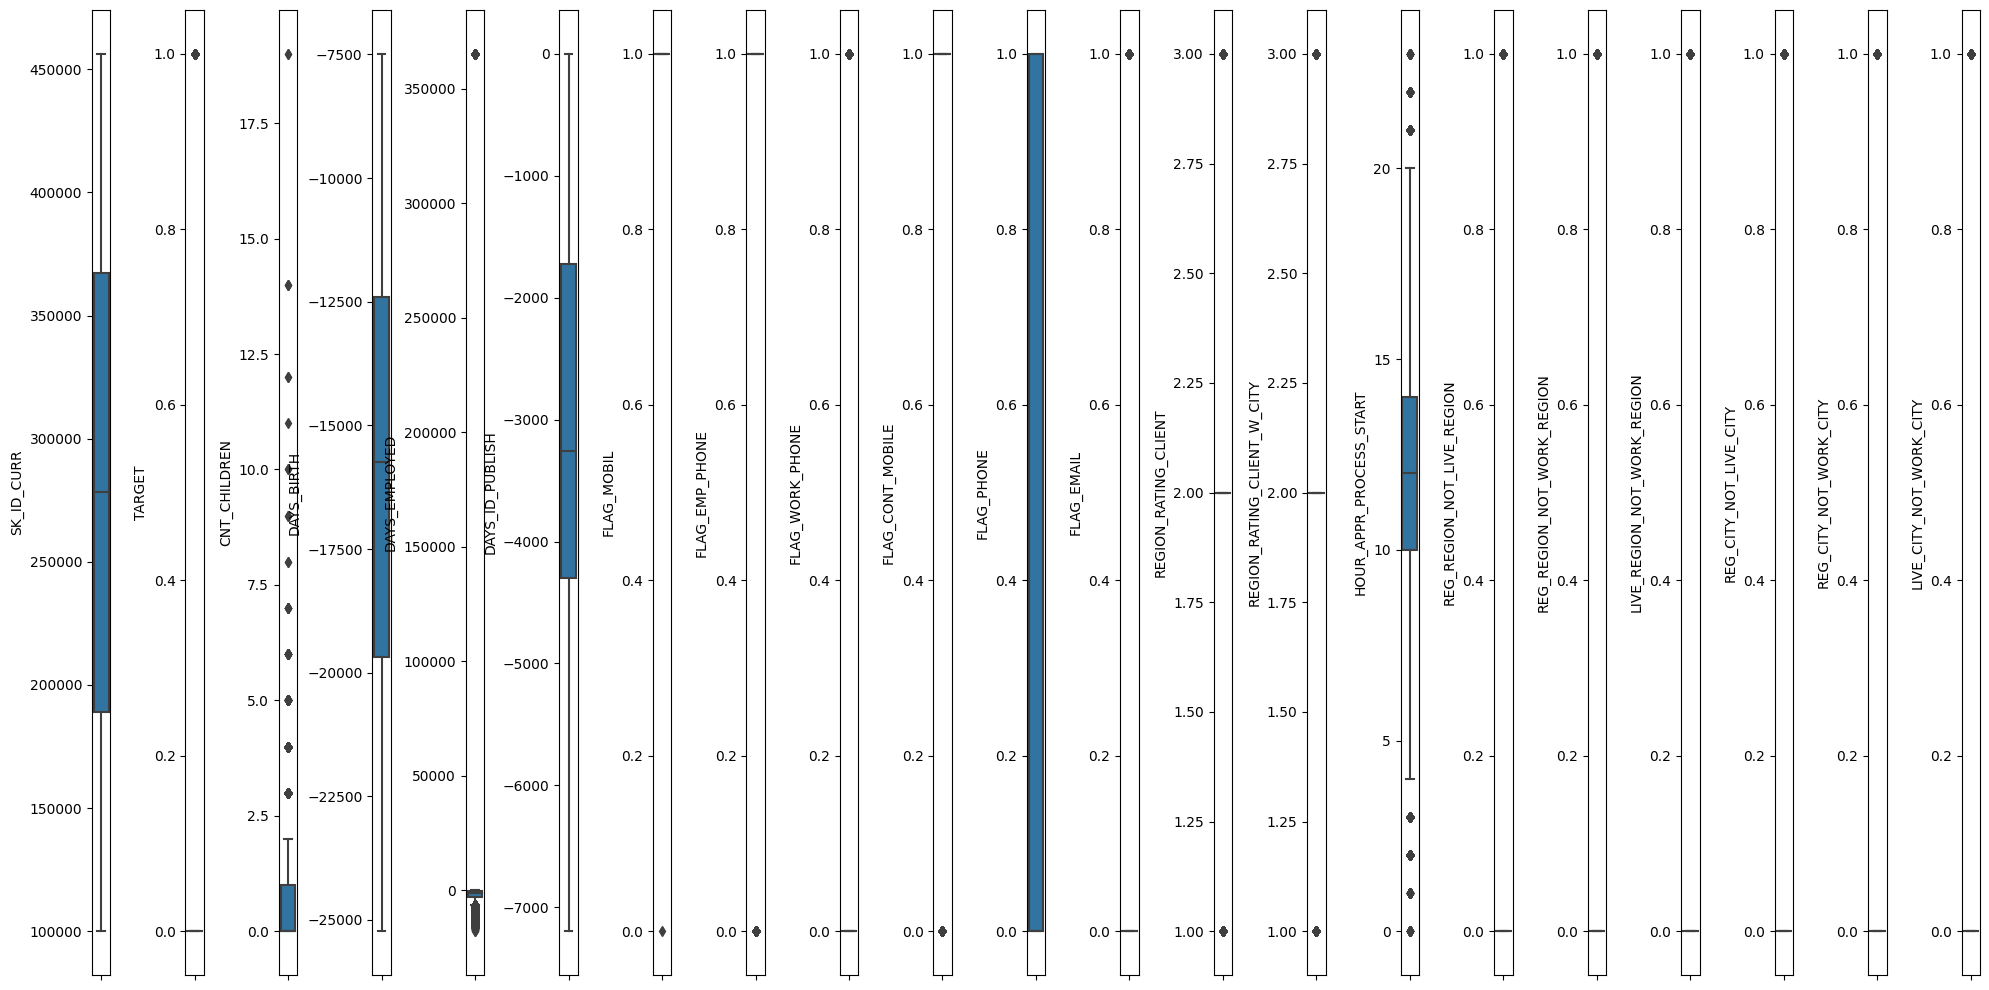

In [15]:
plt.figure(figsize=(20,10))
for i in range(len(num)):
    plt.subplot(1,len(num),i+1)
    sns.boxplot(y=df[num[i]], orient='v')
    plt.tight_layout()

**HASIL PENGAMATAN**<br>
Outlier ada pada kolom CNT_CHILDREN, DAYS_EMPLOYED dan HOUR_APPR_PROCESS_START

#### 3.2.1.2 Histogram dan KDEplot

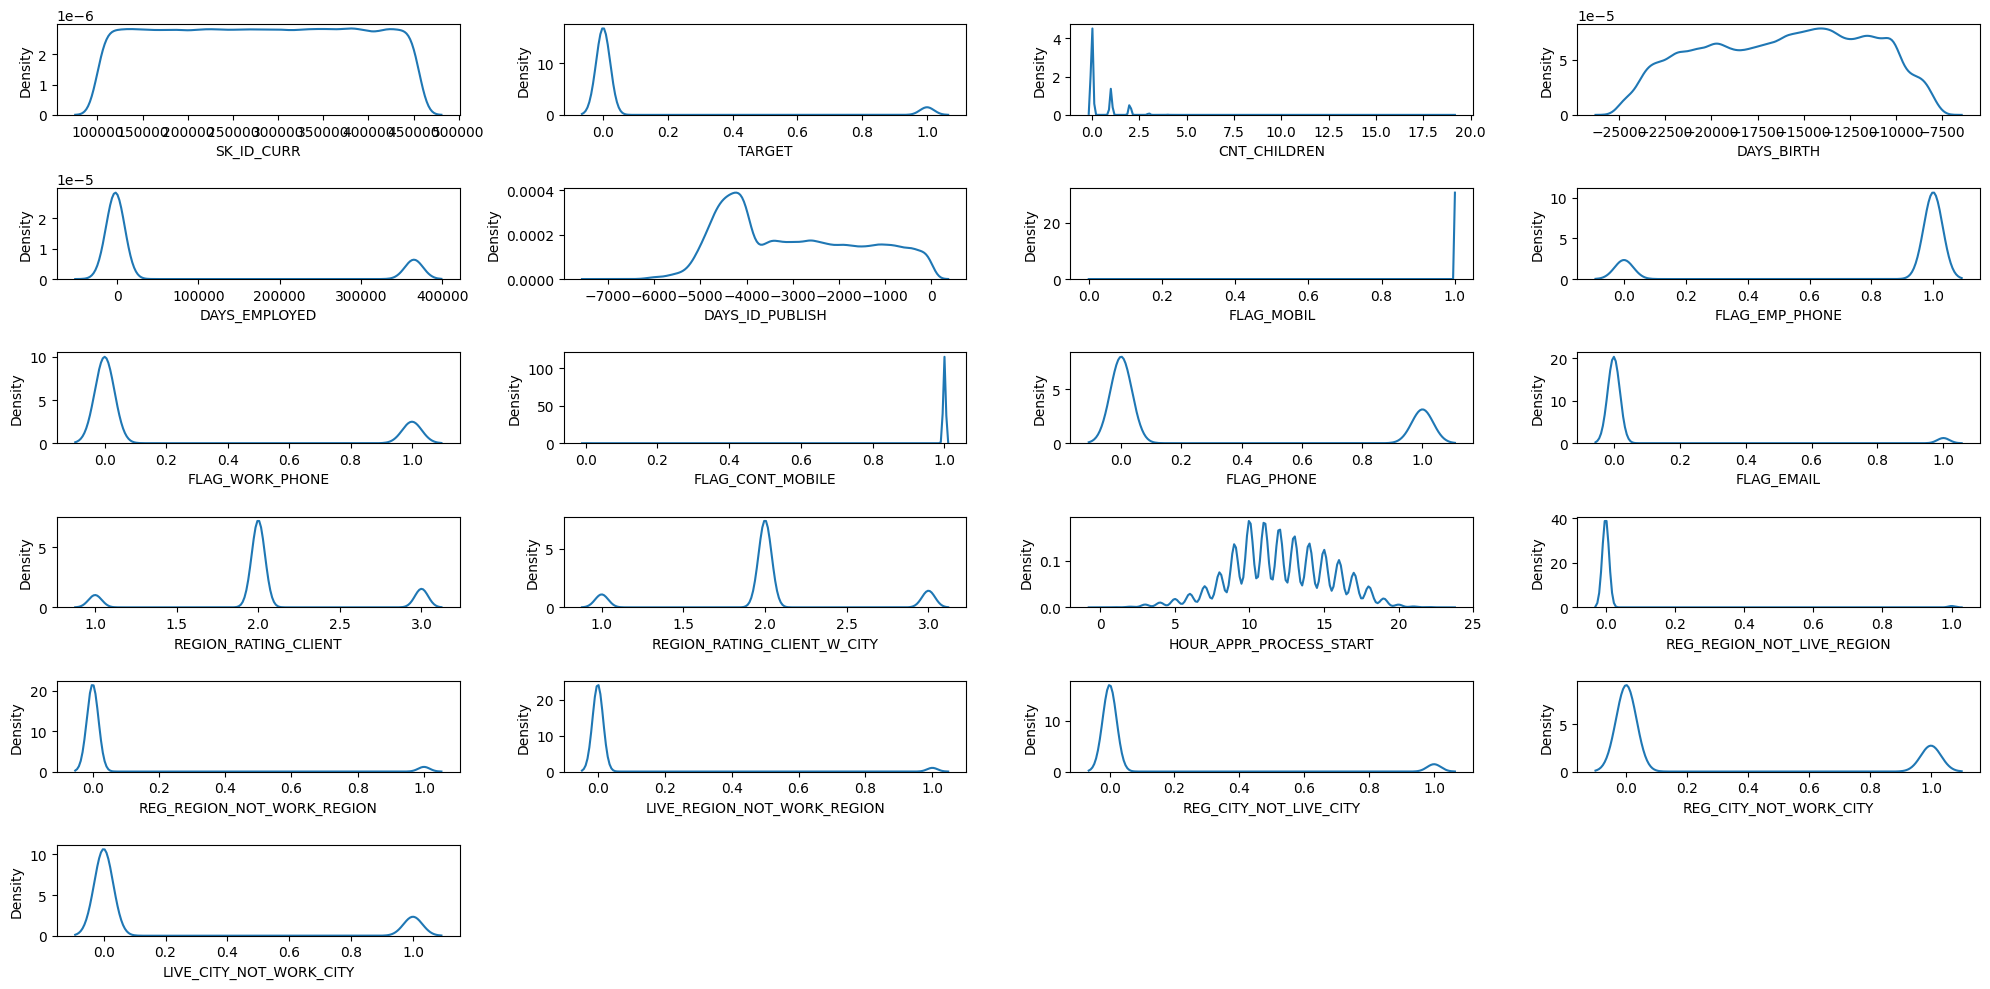

In [16]:
plt.figure(figsize=(20,10))
for i in range(len(num)):
    plt.subplot(6,4, i+1)
    sns.kdeplot(x = df[num[i]])
plt.tight_layout()

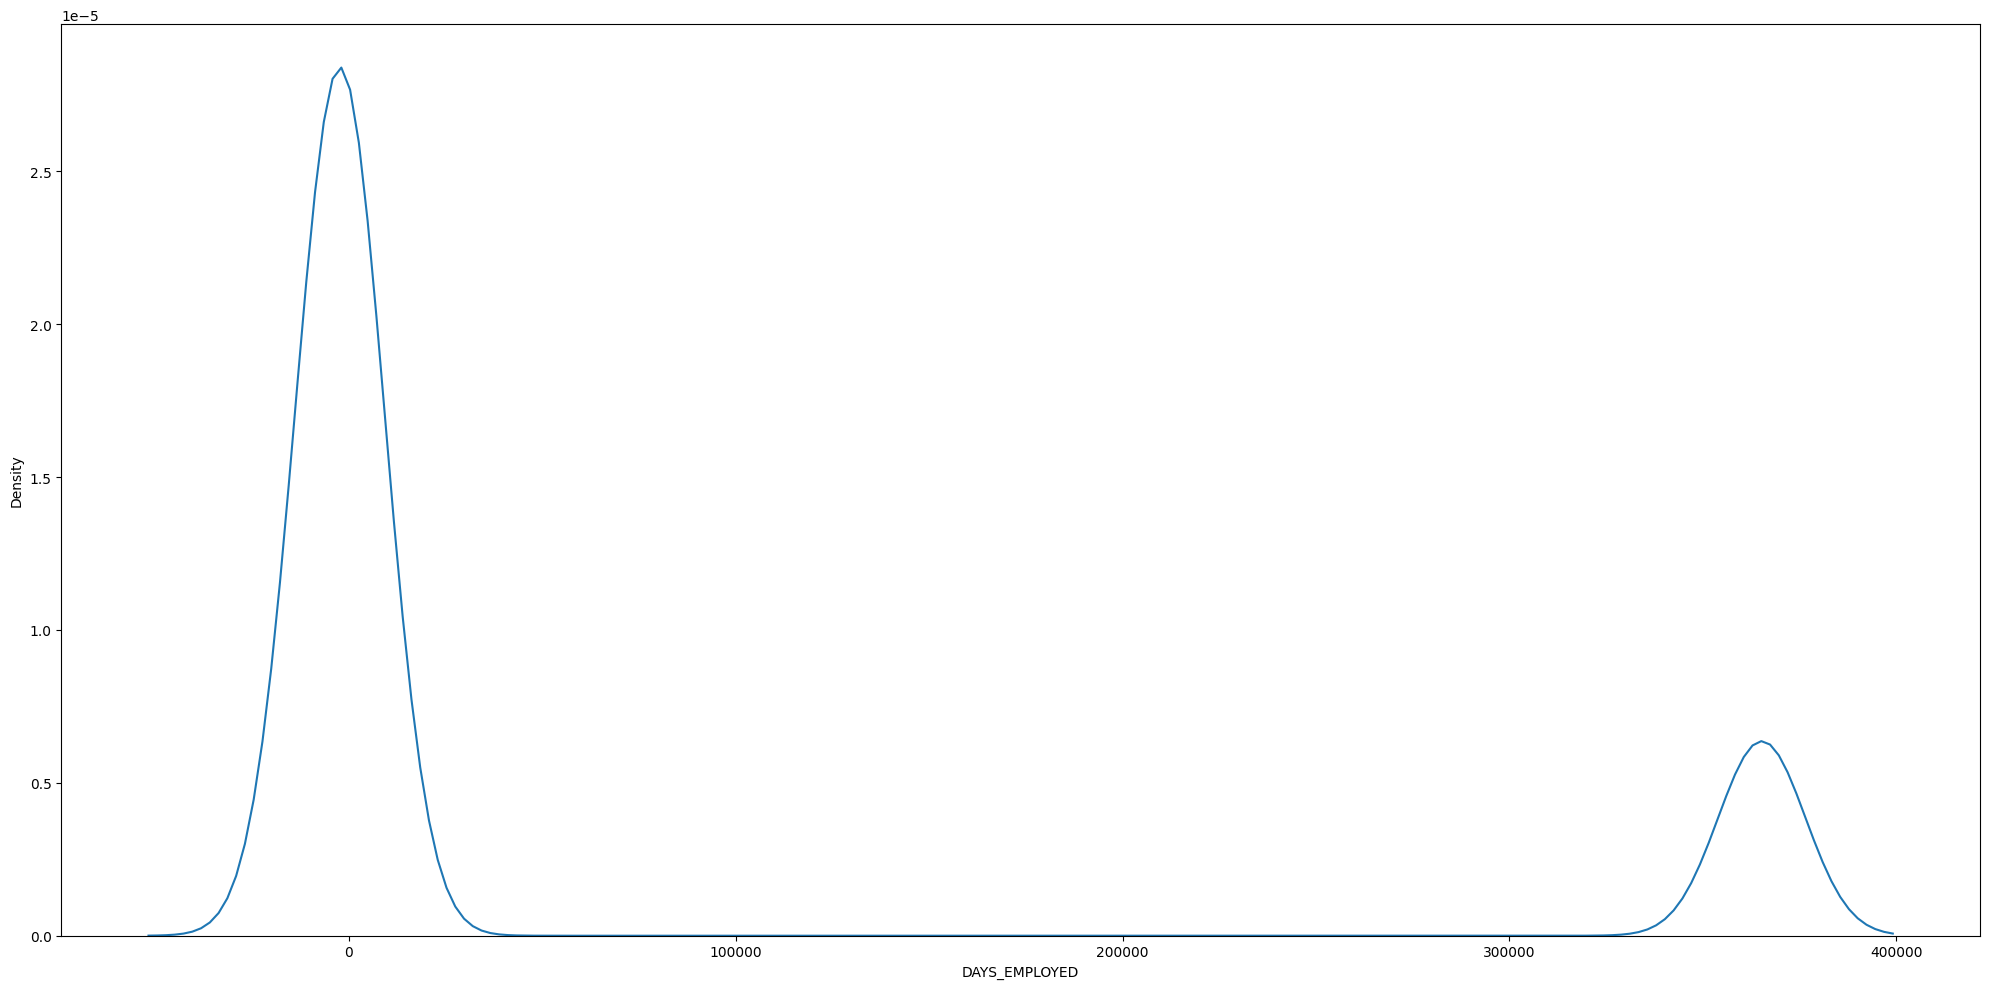

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
sns.kdeplot(x = df['DAYS_EMPLOYED'])
plt.tight_layout()

**HASIL PENGAMATAN**
- Kebanyakan klien memiliki anak kurang dari 3
- Kebanyakan usia klien saat mengajukan peminjaman adalah 27-43 tahun
- Kebanyakan klien merubah data diri 10 bulan - 1.3 tahun sebelum pengajuan
- Kebanyakan rating tempat tinggal klien adalah 2
- Hanya kolom HOUR_APPR_PROCESS_START yang terdistribusi normal

### 3.2.2 Non-Numerical Features

#### 3.2.2.1 Barplot/Countplot

<AxesSubplot: xlabel='count', ylabel='ORGANIZATION_TYPE'>

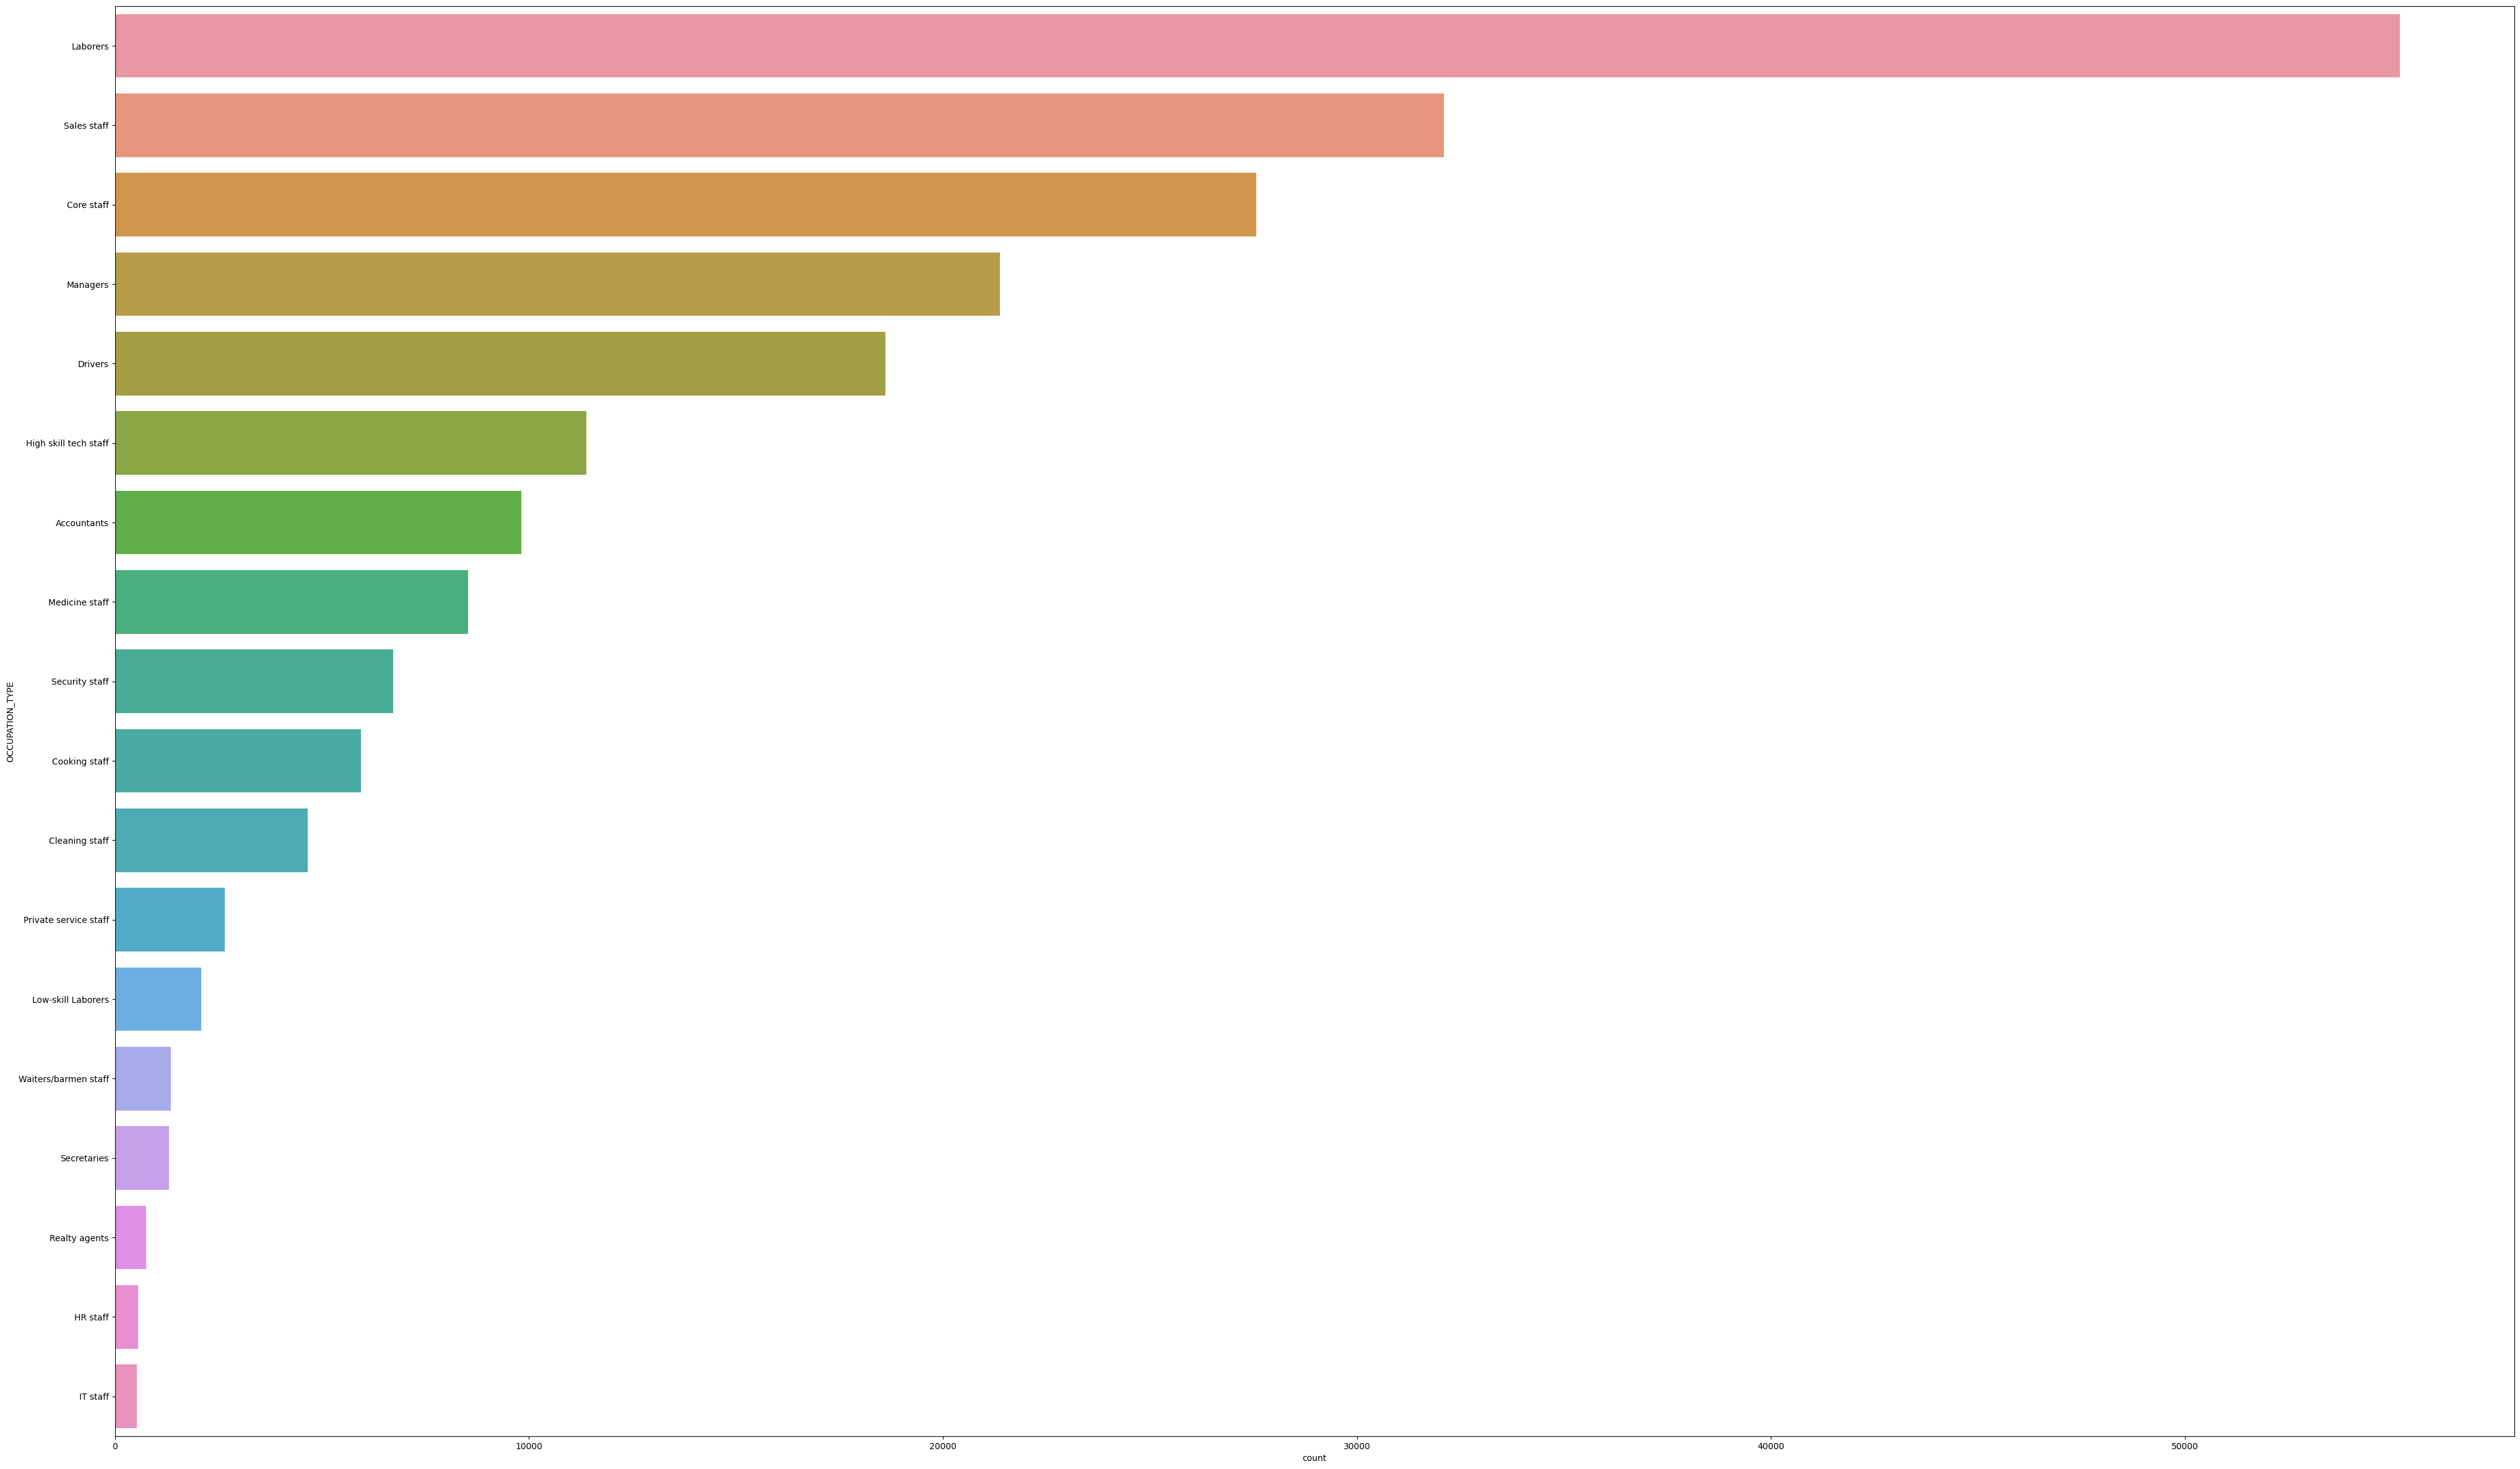

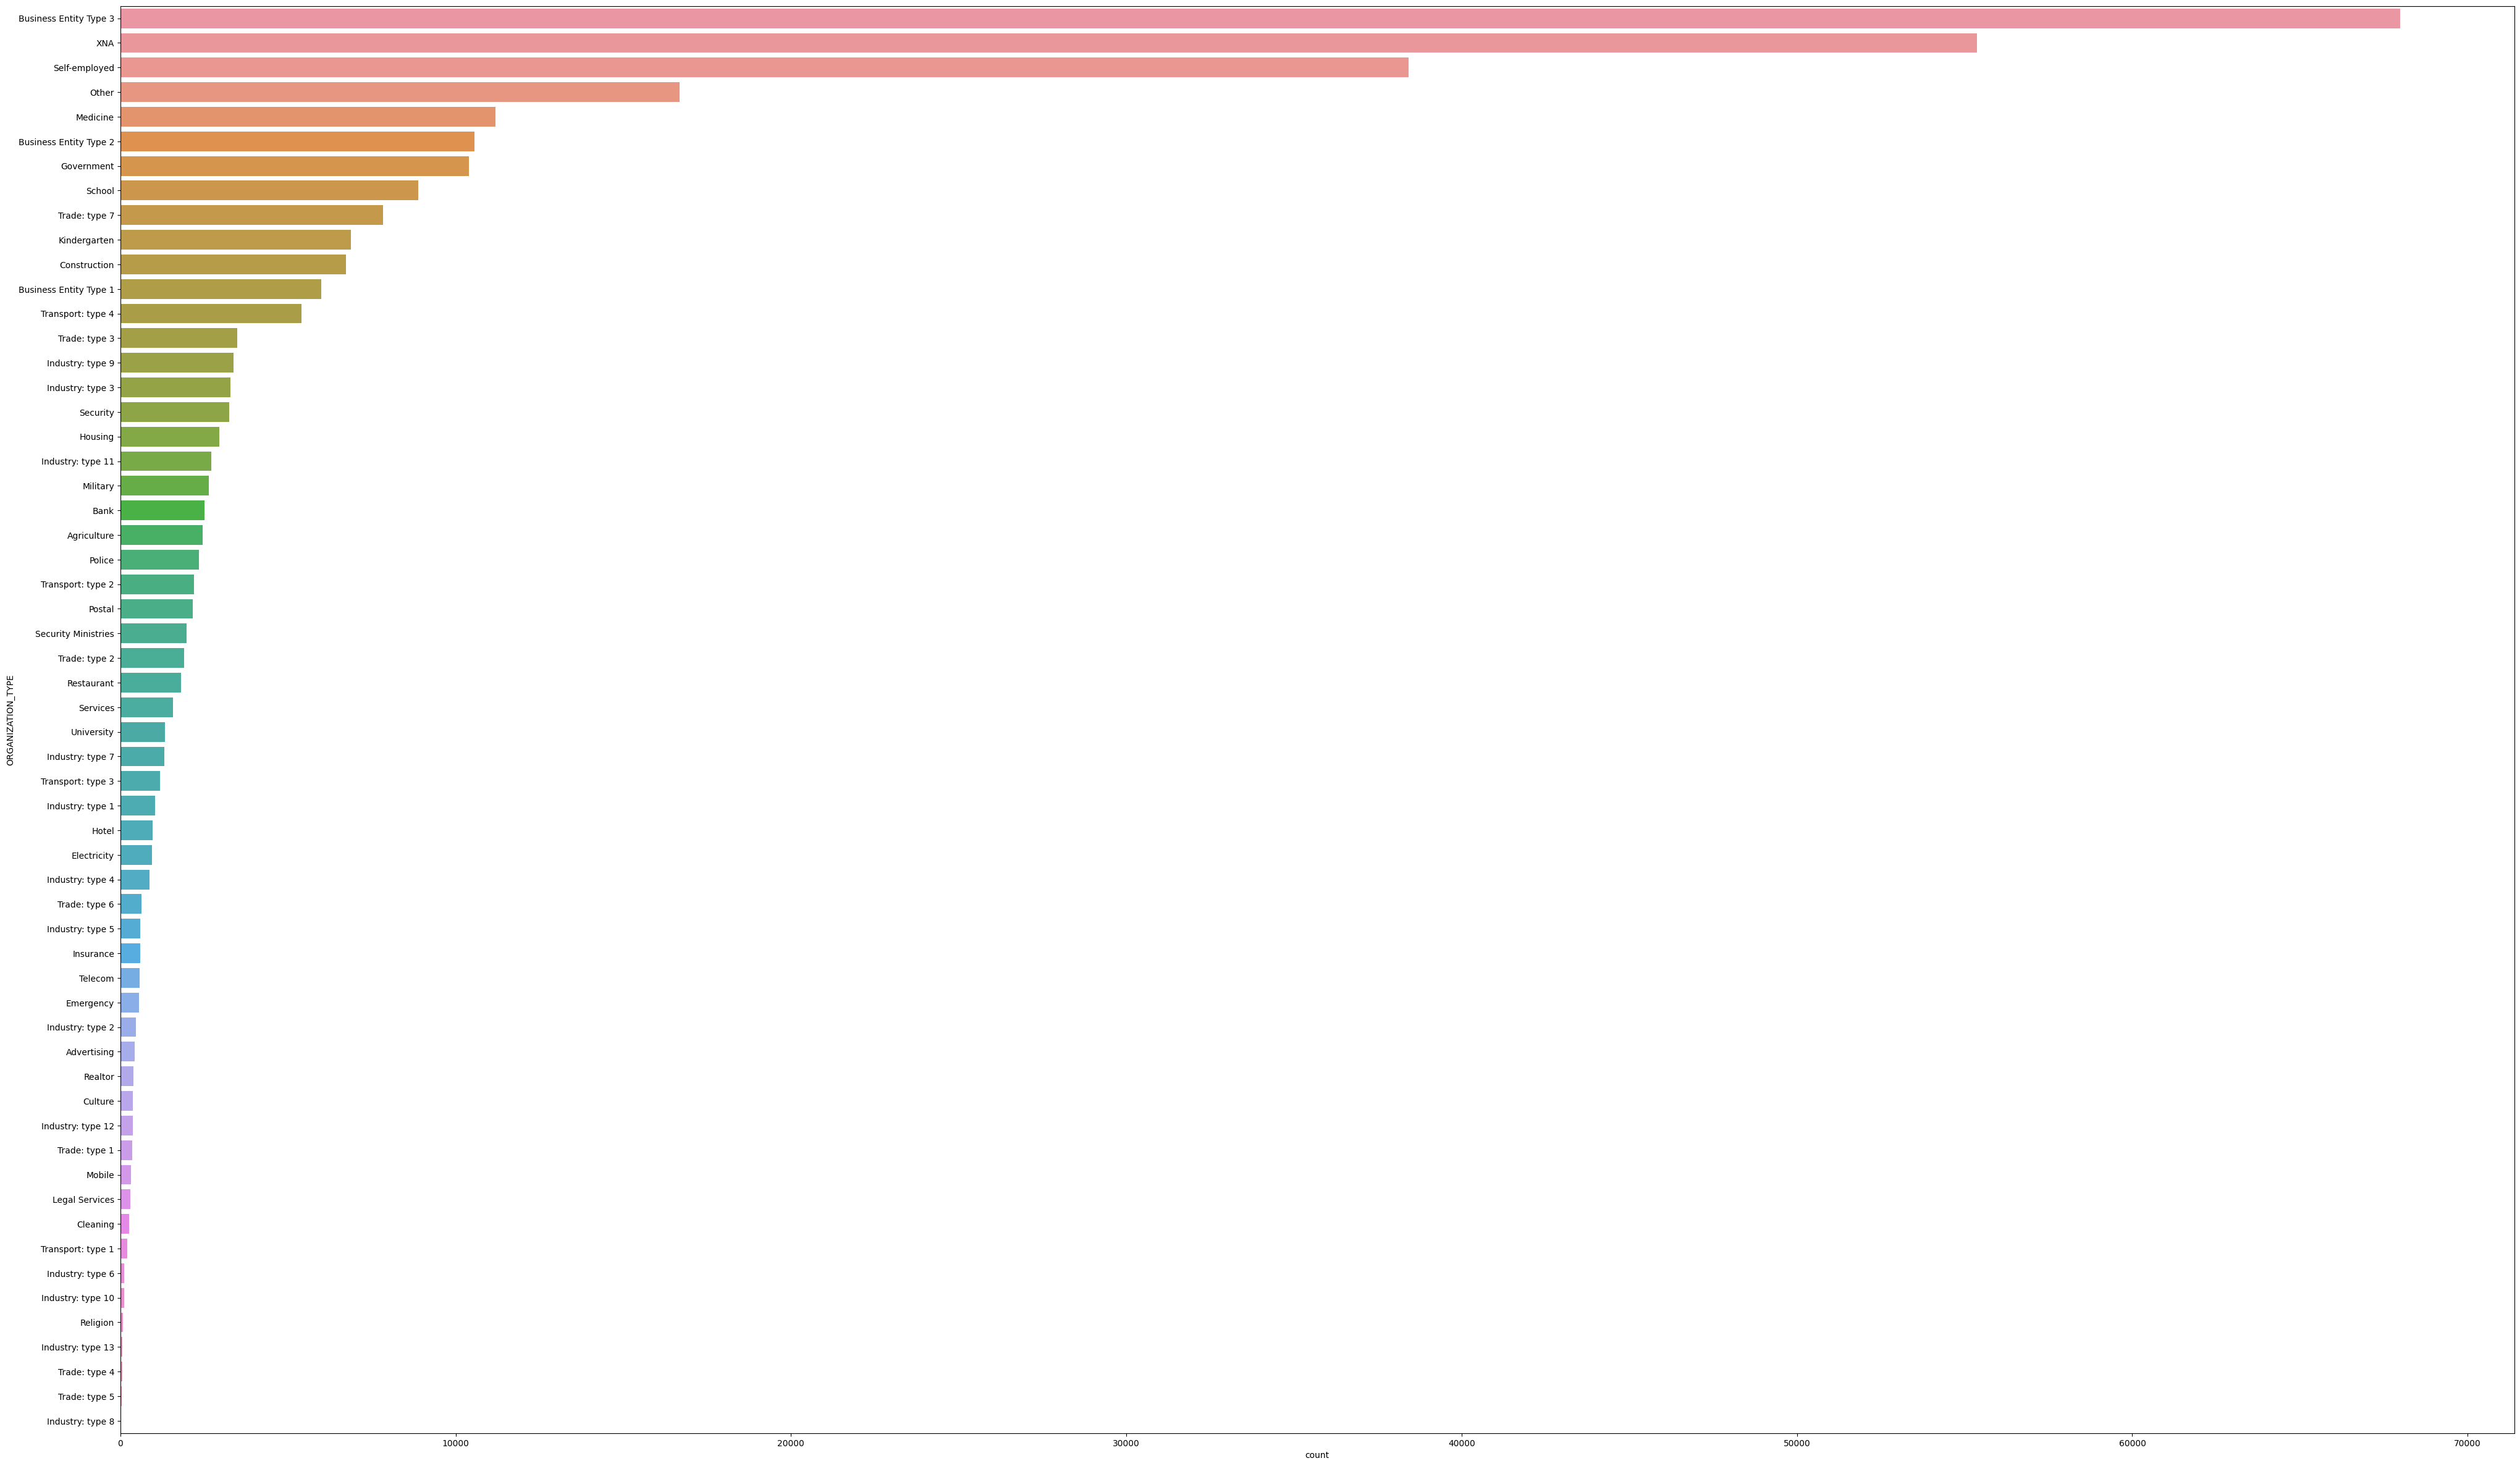

In [18]:
gmb = df['OCCUPATION_TYPE'].value_counts().index
plt.figure(figsize=(50,30))
sns.countplot(data=df, y='OCCUPATION_TYPE', order=df['OCCUPATION_TYPE'].value_counts().index)

gmb = df['ORGANIZATION_TYPE'].value_counts().index
plt.figure(figsize=(50,30))
sns.countplot(data=df, y='ORGANIZATION_TYPE',order=df['ORGANIZATION_TYPE'].value_counts().index)

In [19]:
cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

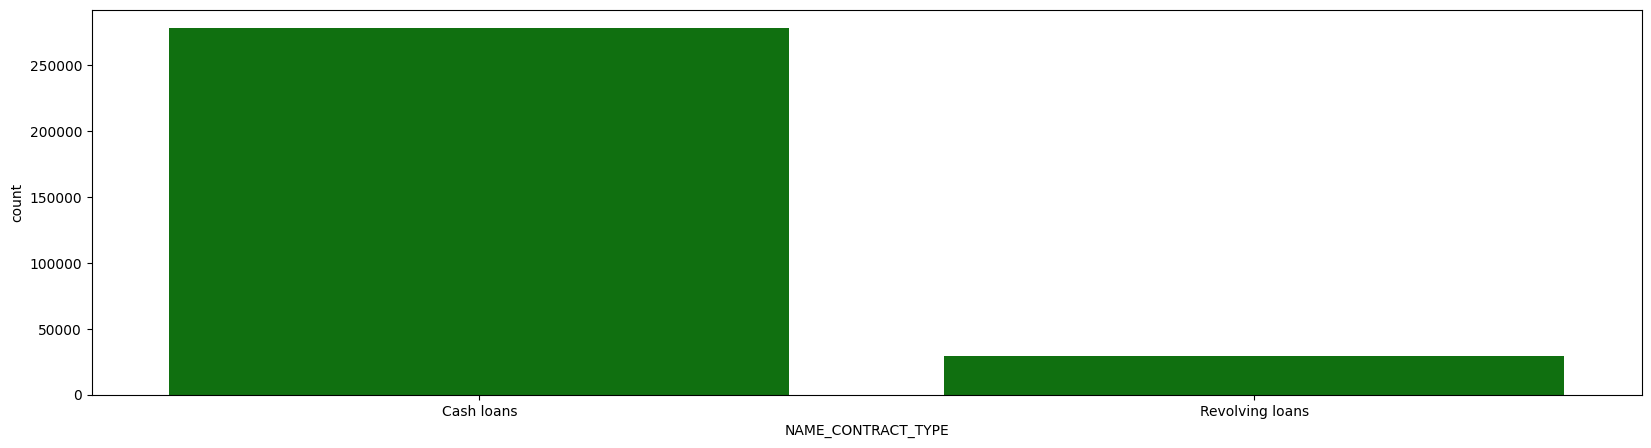

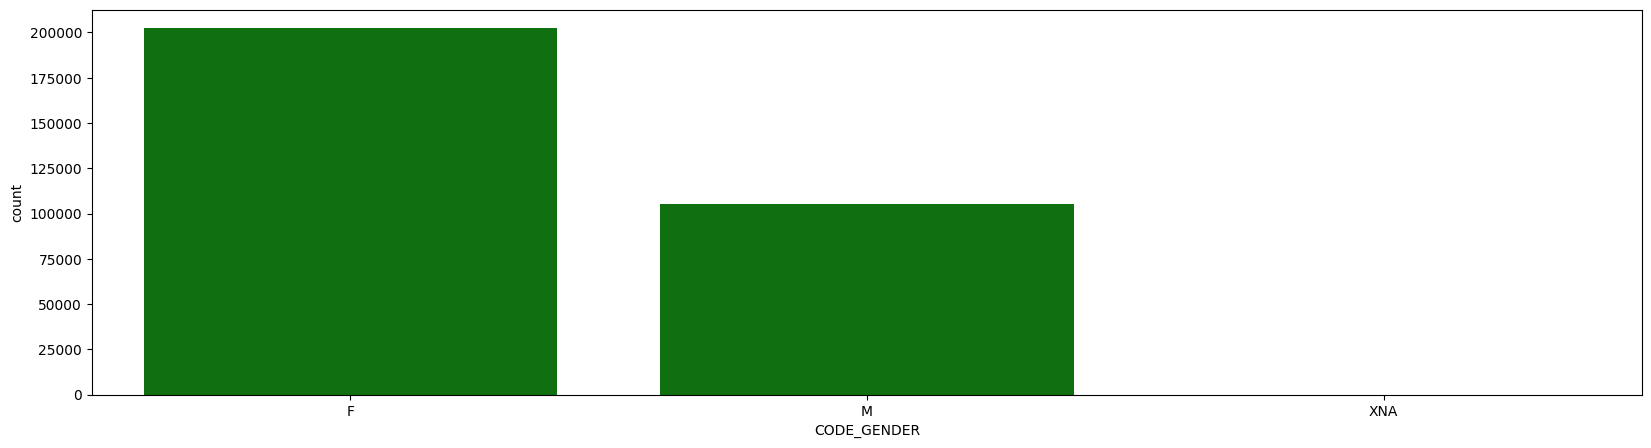

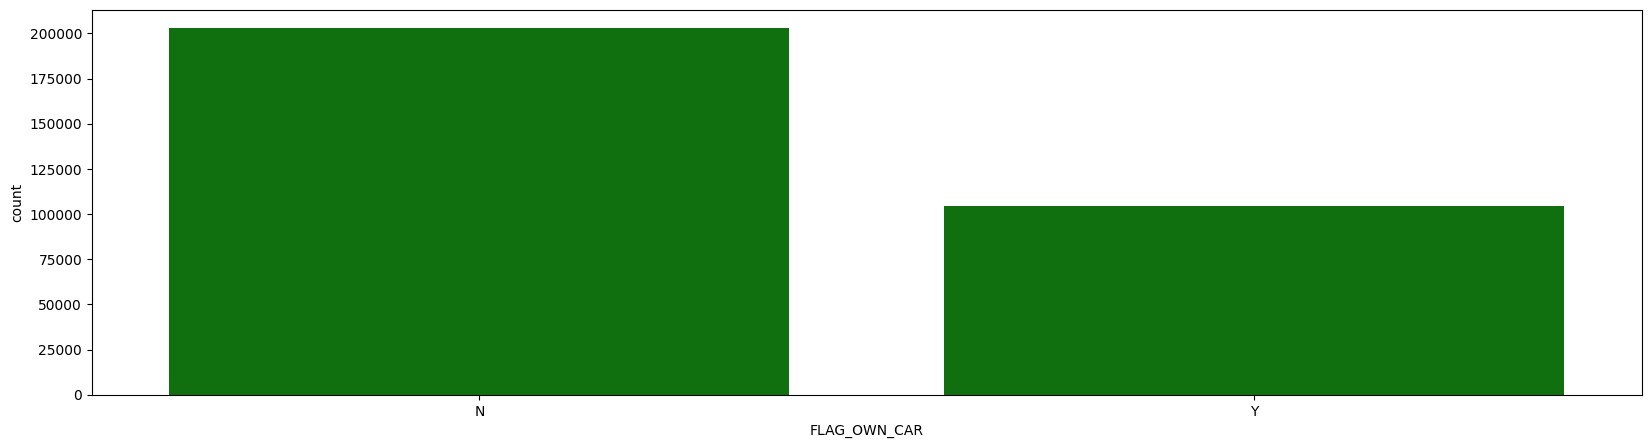

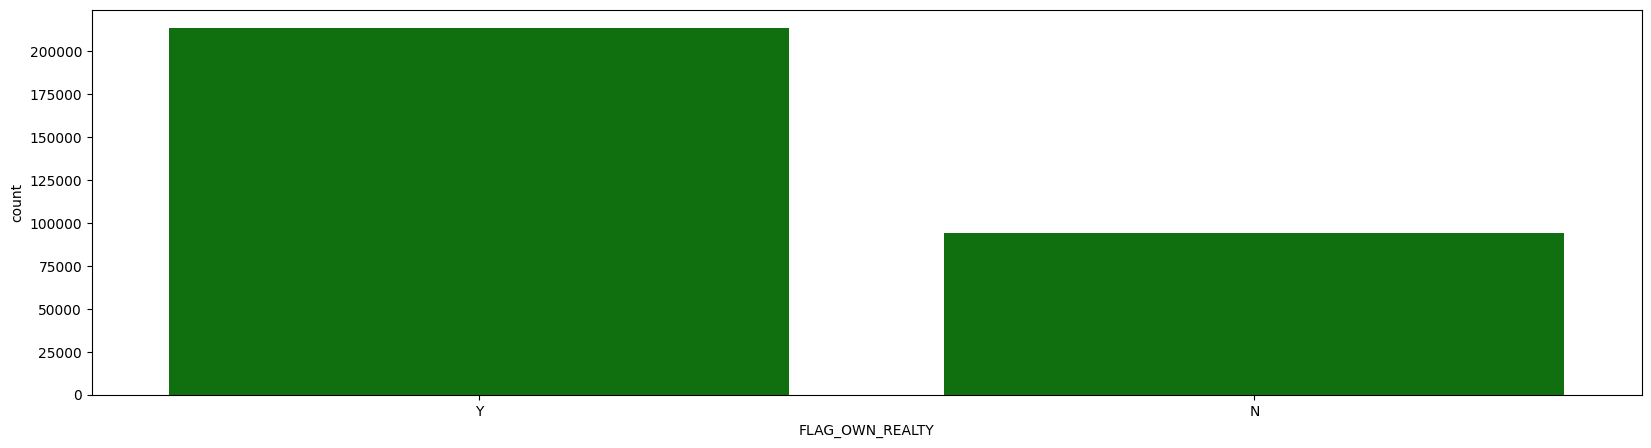

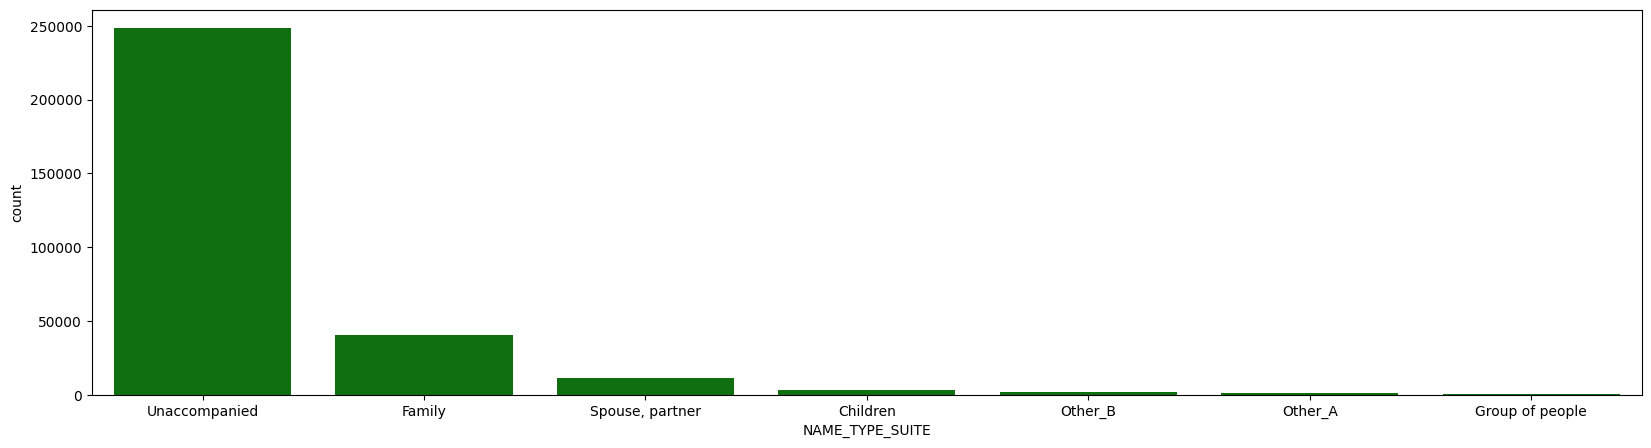

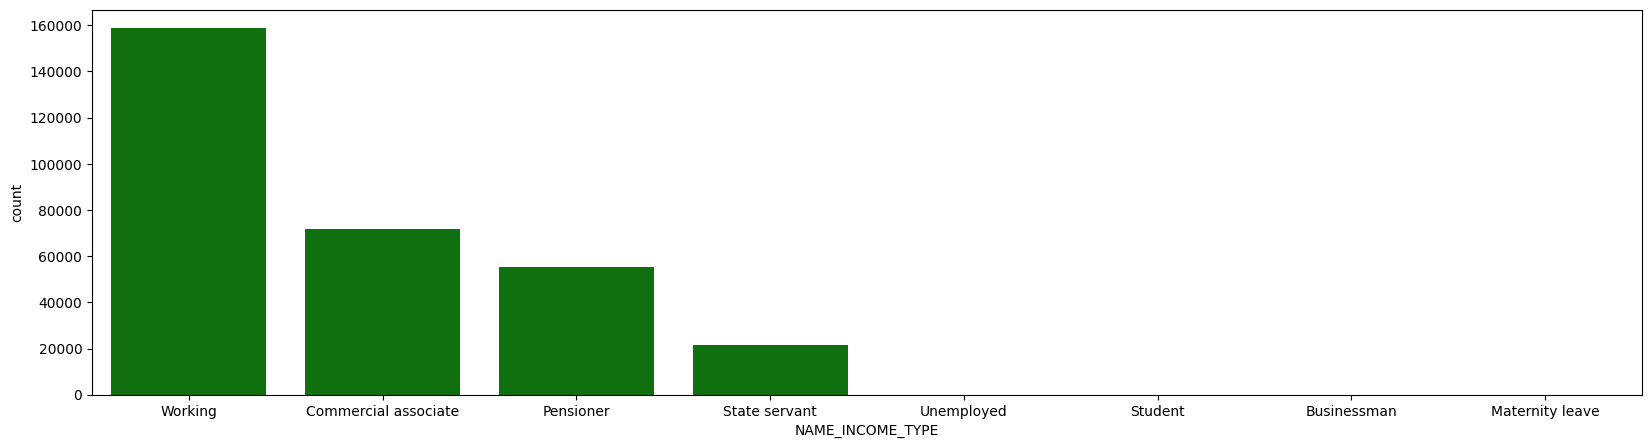

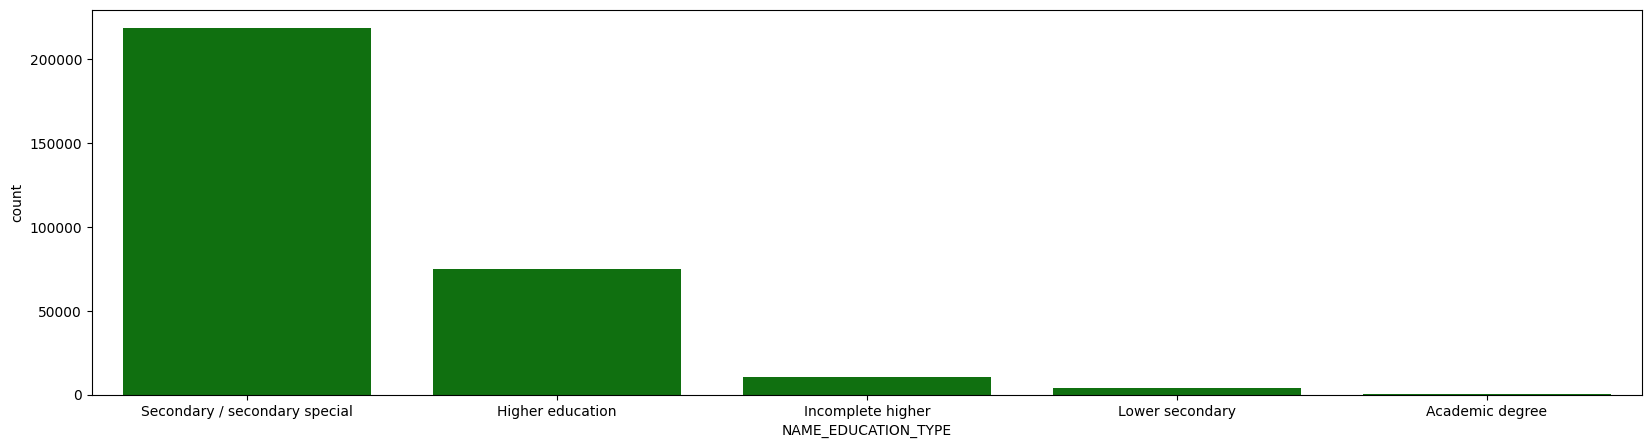

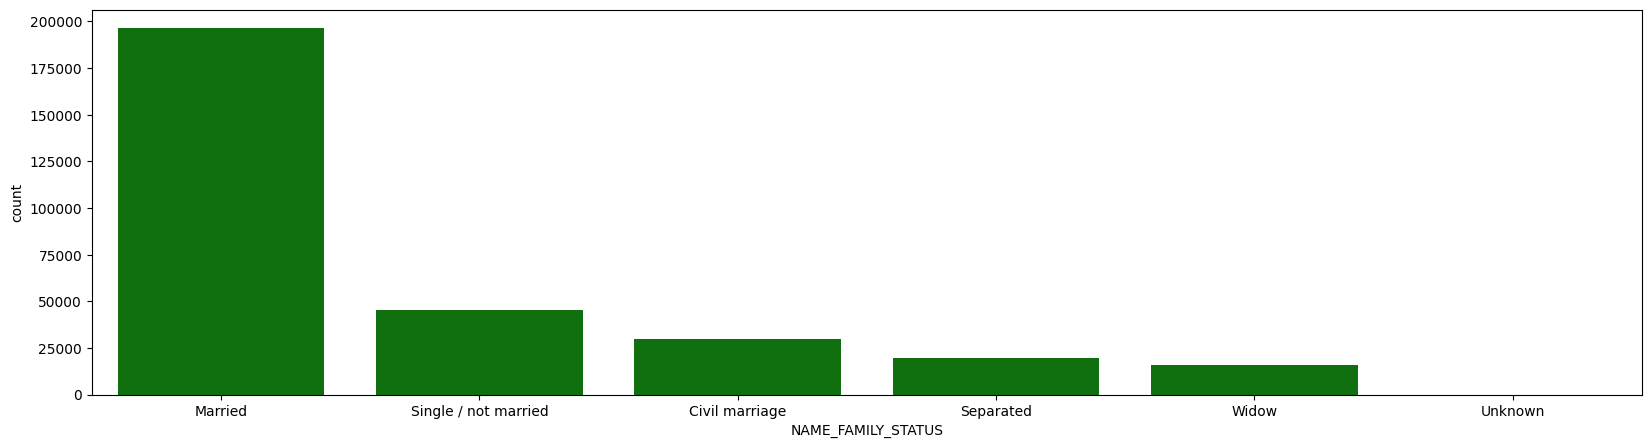

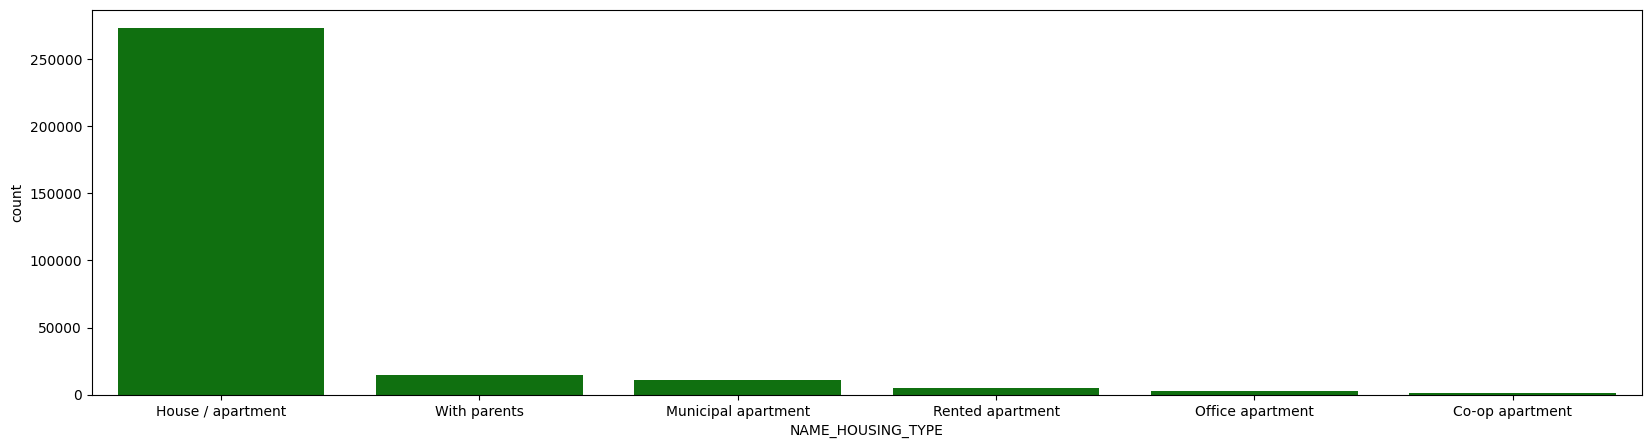

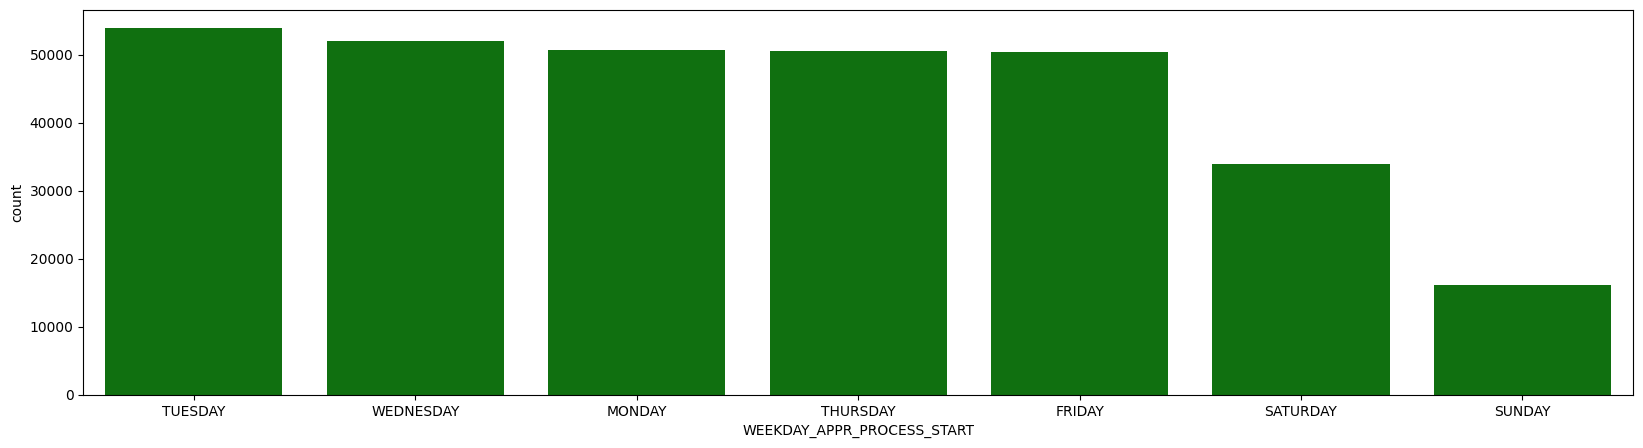

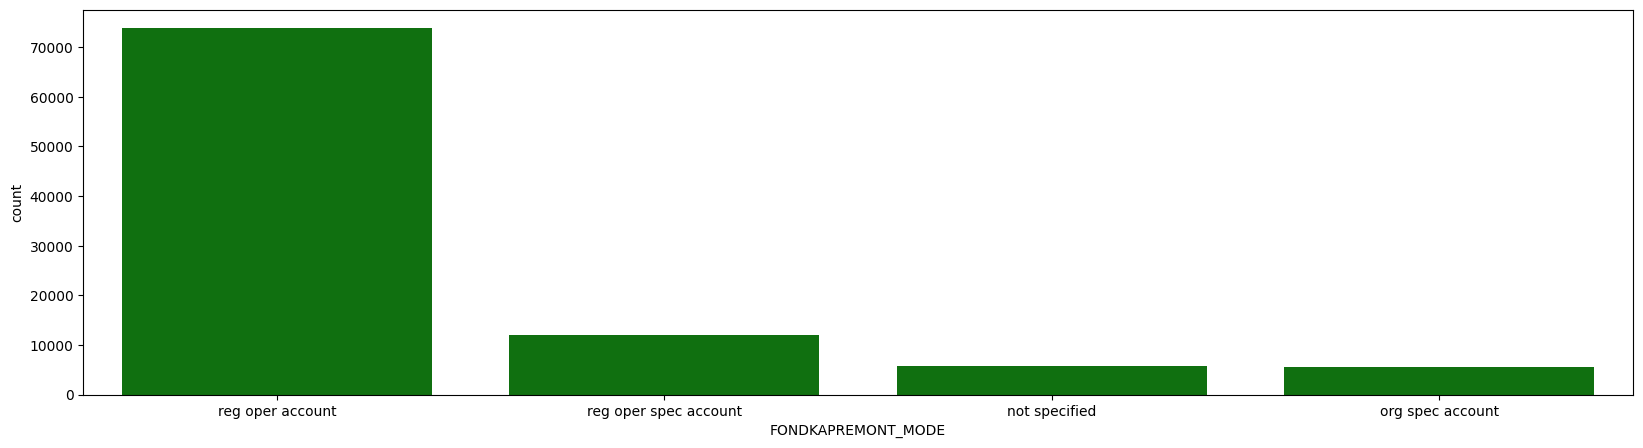

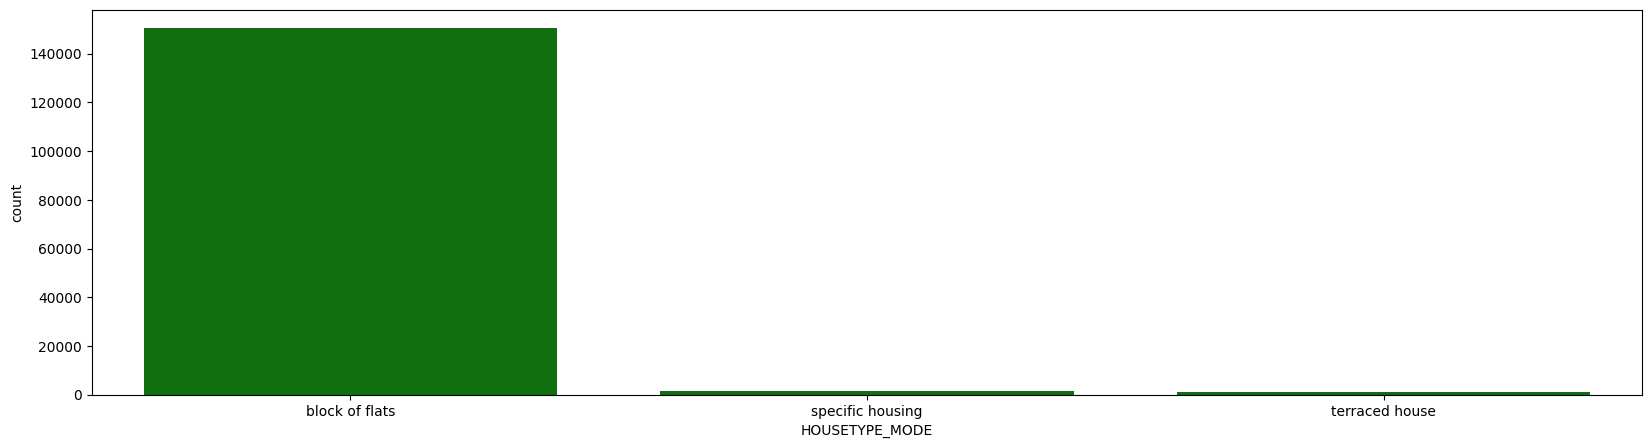

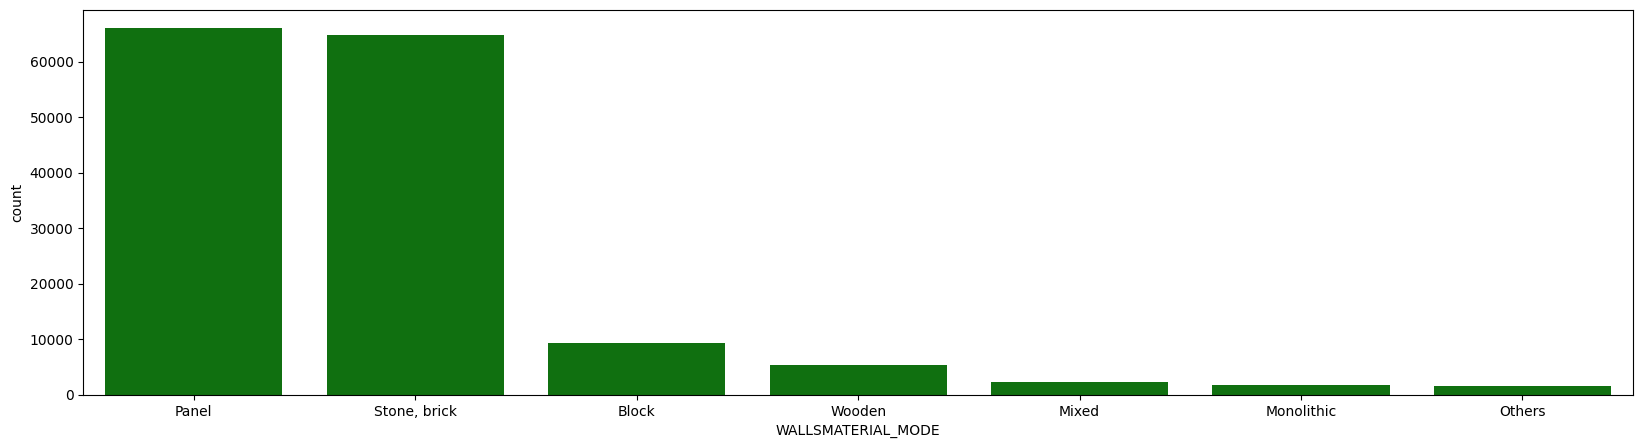

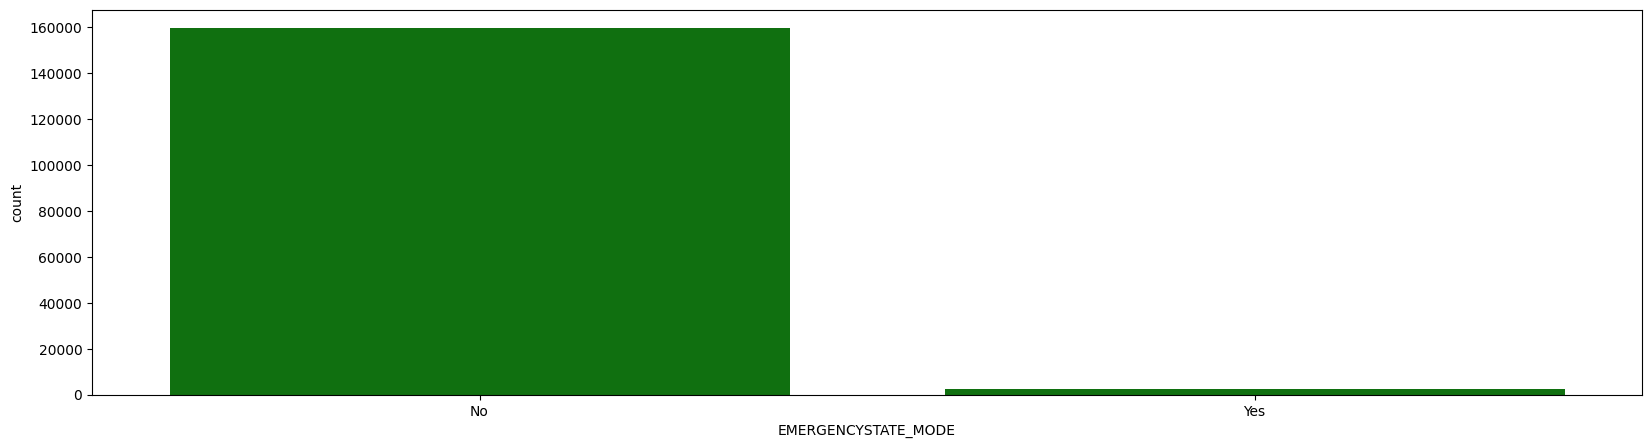

In [20]:
for i in cat:
    if i not in ['OCCUPATION_TYPE','ORGANIZATION_TYPE']:
        plt.figure(figsize=(20, 5))
        sns.countplot(x=df[i], color='green', orient='v',order=df[i].value_counts().index)
# plt.figure(figsize=(20, 5))
# sns.countplot(x=df['NAME_CONTRACT_TYPE'], color='green', orient='v')

**HASIL PENGAMATAN**<br>
- x
- x

## 3.3 Multivariate Analysis

### 3.3.1 Numerical Features

#### 3.3.1.1 Correlation Heatmap

In [21]:
df[num].corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  DAYS_BIRTH  \
SK_ID_CURR                     1.000000 -0.002108     -0.001129   -0.001500   
TARGET                        -0.002108  1.000000      0.019187    0.078239   
CNT_CHILDREN                  -0.001129  0.019187      1.000000    0.330938   
DAYS_BIRTH                    -0.001500  0.078239      0.330938    1.000000   
DAYS_EMPLOYED                  0.001366 -0.044932     -0.239818   -0.615864   
DAYS_ID_PUBLISH               -0.000384  0.051457     -0.028019    0.272691   
FLAG_MOBIL                     0.002804  0.000534      0.001041   -0.003084   
FLAG_EMP_PHONE                -0.001337  0.045982      0.240714    0.619888   
FLAG_WORK_PHONE               -0.000415  0.028524      0.055630    0.172457   
FLAG_CONT_MOBILE               0.002815  0.000370     -0.000794   -0.014985   
FLAG_PHONE                     0.002753 -0.023806     -0.029906   -0.042402   
FLAG_EMAIL                     0.000281 -0.001758      0.022619    0.088208   
REGION_RATING_CLIENT          -0.001075  0.058899      0.025423    0.009361   
REGION_RATING_CLIENT_W_CITY   -0.001138  0.060893      0.024781    0.008073   
HOUR_APPR_PROCESS_START        0.000350 -0.024166     -0.007292    0.091064   
REG_REGION_NOT_LIVE_REGION    -0.000283  0.005576     -0.013319    0.065486   
REG_REGION_NOT_WORK_REGION     0.001097  0.006942      0.008185    0.095819   
LIVE_REGION_NOT_WORK_REGION    0.002903  0.002819      0.014835    0.069567   
REG_CITY_NOT_LIVE_CITY        -0.001885  0.044395      0.020072    0.180382   
REG_CITY_NOT_WORK_CITY        -0.001582  0.050994      0.070650    0.242401   
LIVE_CITY_NOT_WORK_CITY        0.000067  0.032518      0.069957    0.158882   

                             DAYS_EMPLOYED  DAYS_ID_PUBLISH  FLAG_MOBIL  \
SK_ID_CURR                        0.001366        -0.000384    0.002804   
TARGET                           -0.044932         0.051457    0.000534   
CNT_CHILDREN                     -0.239818        -0.028019    0.001041   
DAYS_BIRTH                       -0.615864         0.272691   -0.003084   
DAYS_EMPLOYED                     1.000000        -0.272378    0.000818   
DAYS_ID_PUBLISH                  -0.272378         1.000000   -0.002293   
FLAG_MOBIL                        0.000818        -0.002293    1.000000   
FLAG_EMP_PHONE                   -0.999755         0.273611   -0.000845   
FLAG_WORK_PHONE                  -0.233972         0.045964    0.000900   
FLAG_CONT_MOBILE                  0.012745        -0.000802   -0.000078   
FLAG_PHONE                        0.015291        -0.037660    0.001128   
FLAG_EMAIL                       -0.062112         0.027505    0.000442   
REGION_RATING_CLIENT              0.032750        -0.005103    0.000186   
REGION_RATING_CLIENT_W_CITY       0.034624        -0.007737    0.000113   
HOUR_APPR_PROCESS_START          -0.091138         0.031676   -0.000517   
REG_REGION_NOT_LIVE_REGION       -0.035803         0.034757    0.000224   
REG_REGION_NOT_WORK_REGION       -0.107150         0.048071    0.000417   
LIVE_REGION_NOT_WORK_REGION      -0.095539         0.033938    0.000371   
REG_CITY_NOT_LIVE_CITY           -0.090516         0.076326    0.000525   
REG_CITY_NOT_WORK_CITY           -0.254559         0.099354    0.000987   
LIVE_CITY_NOT_WORK_CITY          -0.218101         0.061094    0.000844   

                             FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
SK_ID_CURR                        -0.001337        -0.000415   
TARGET                             0.045982         0.028524   
CNT_CHILDREN                       0.240714         0.055630   
DAYS_BIRTH                         0.619888         0.172457   
DAYS_EMPLOYED                     -0.999755        -0.233972   
DAYS_ID_PUBLISH                    0.273611         0.045964   
FLAG_MOBIL                        -0.000845         0.000900   
FLAG_EMP_PHONE                     1.000000         0.233801   
FLAG_WORK_PHONE                    0.233801         1.000000   

<AxesSubplot: >

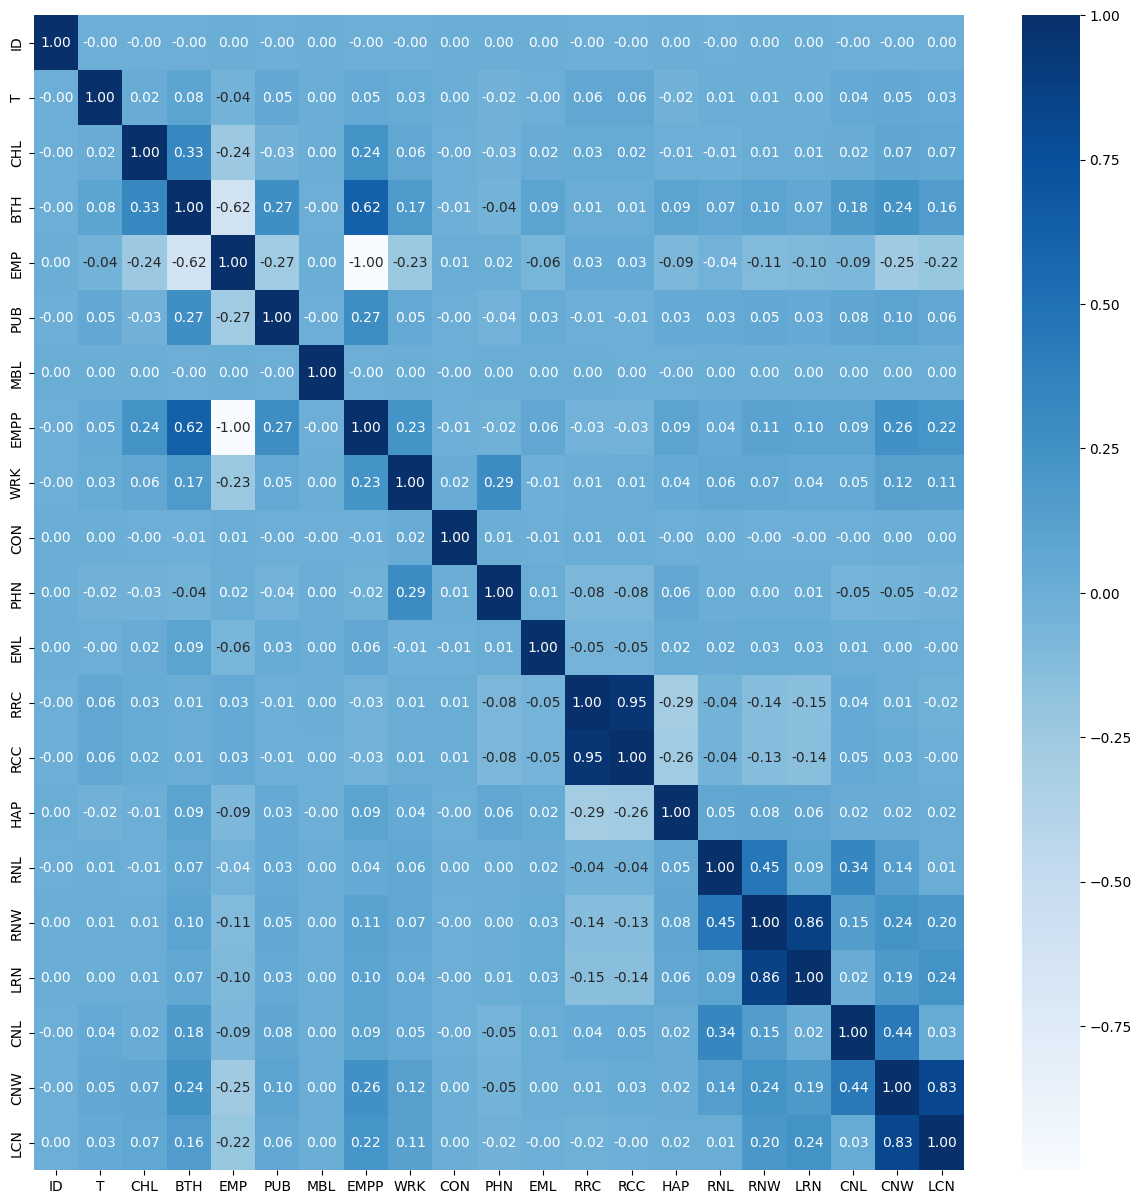

In [22]:
df_cm = df[num]
df_cm.columns = ['ID','T','CHL','BTH','EMP','PUB','MBL','EMPP','WRK','CON','PHN','EML','RRC','RCC','HAP','RNL','RNW','LRN','CNL','CNW','LCN']
plt.figure(figsize=(15,15))
sns.heatmap(df_cm.corr(), cmap='Blues', annot=True, fmt='.2f')

**HASIL PENGAMATAN**<br>
- Tidak ada feature yg memiliki korelasi kuat dengan TARGET
- Kolom yang memiliki korelasi kuat:
    - REGION_RATING_CLIENT - REGION_RATING_CLIENT_W_CITY (+)
    - REG_REGION_NOT_WORK_REGION - LIVE_REGION_NOT_WORK_REGION (+)
    - REG_CITY_NOT_WORK_CITY - LIVE_CITY_NOT_WORK_CITY (+)
    - DAYS_BIRTH - DAYS_EMPLOYED (-)
    - DAYS_EMPLOYED - FLAG_EMP_PHONE (-)

#### 3.3.1.2 Pairplot

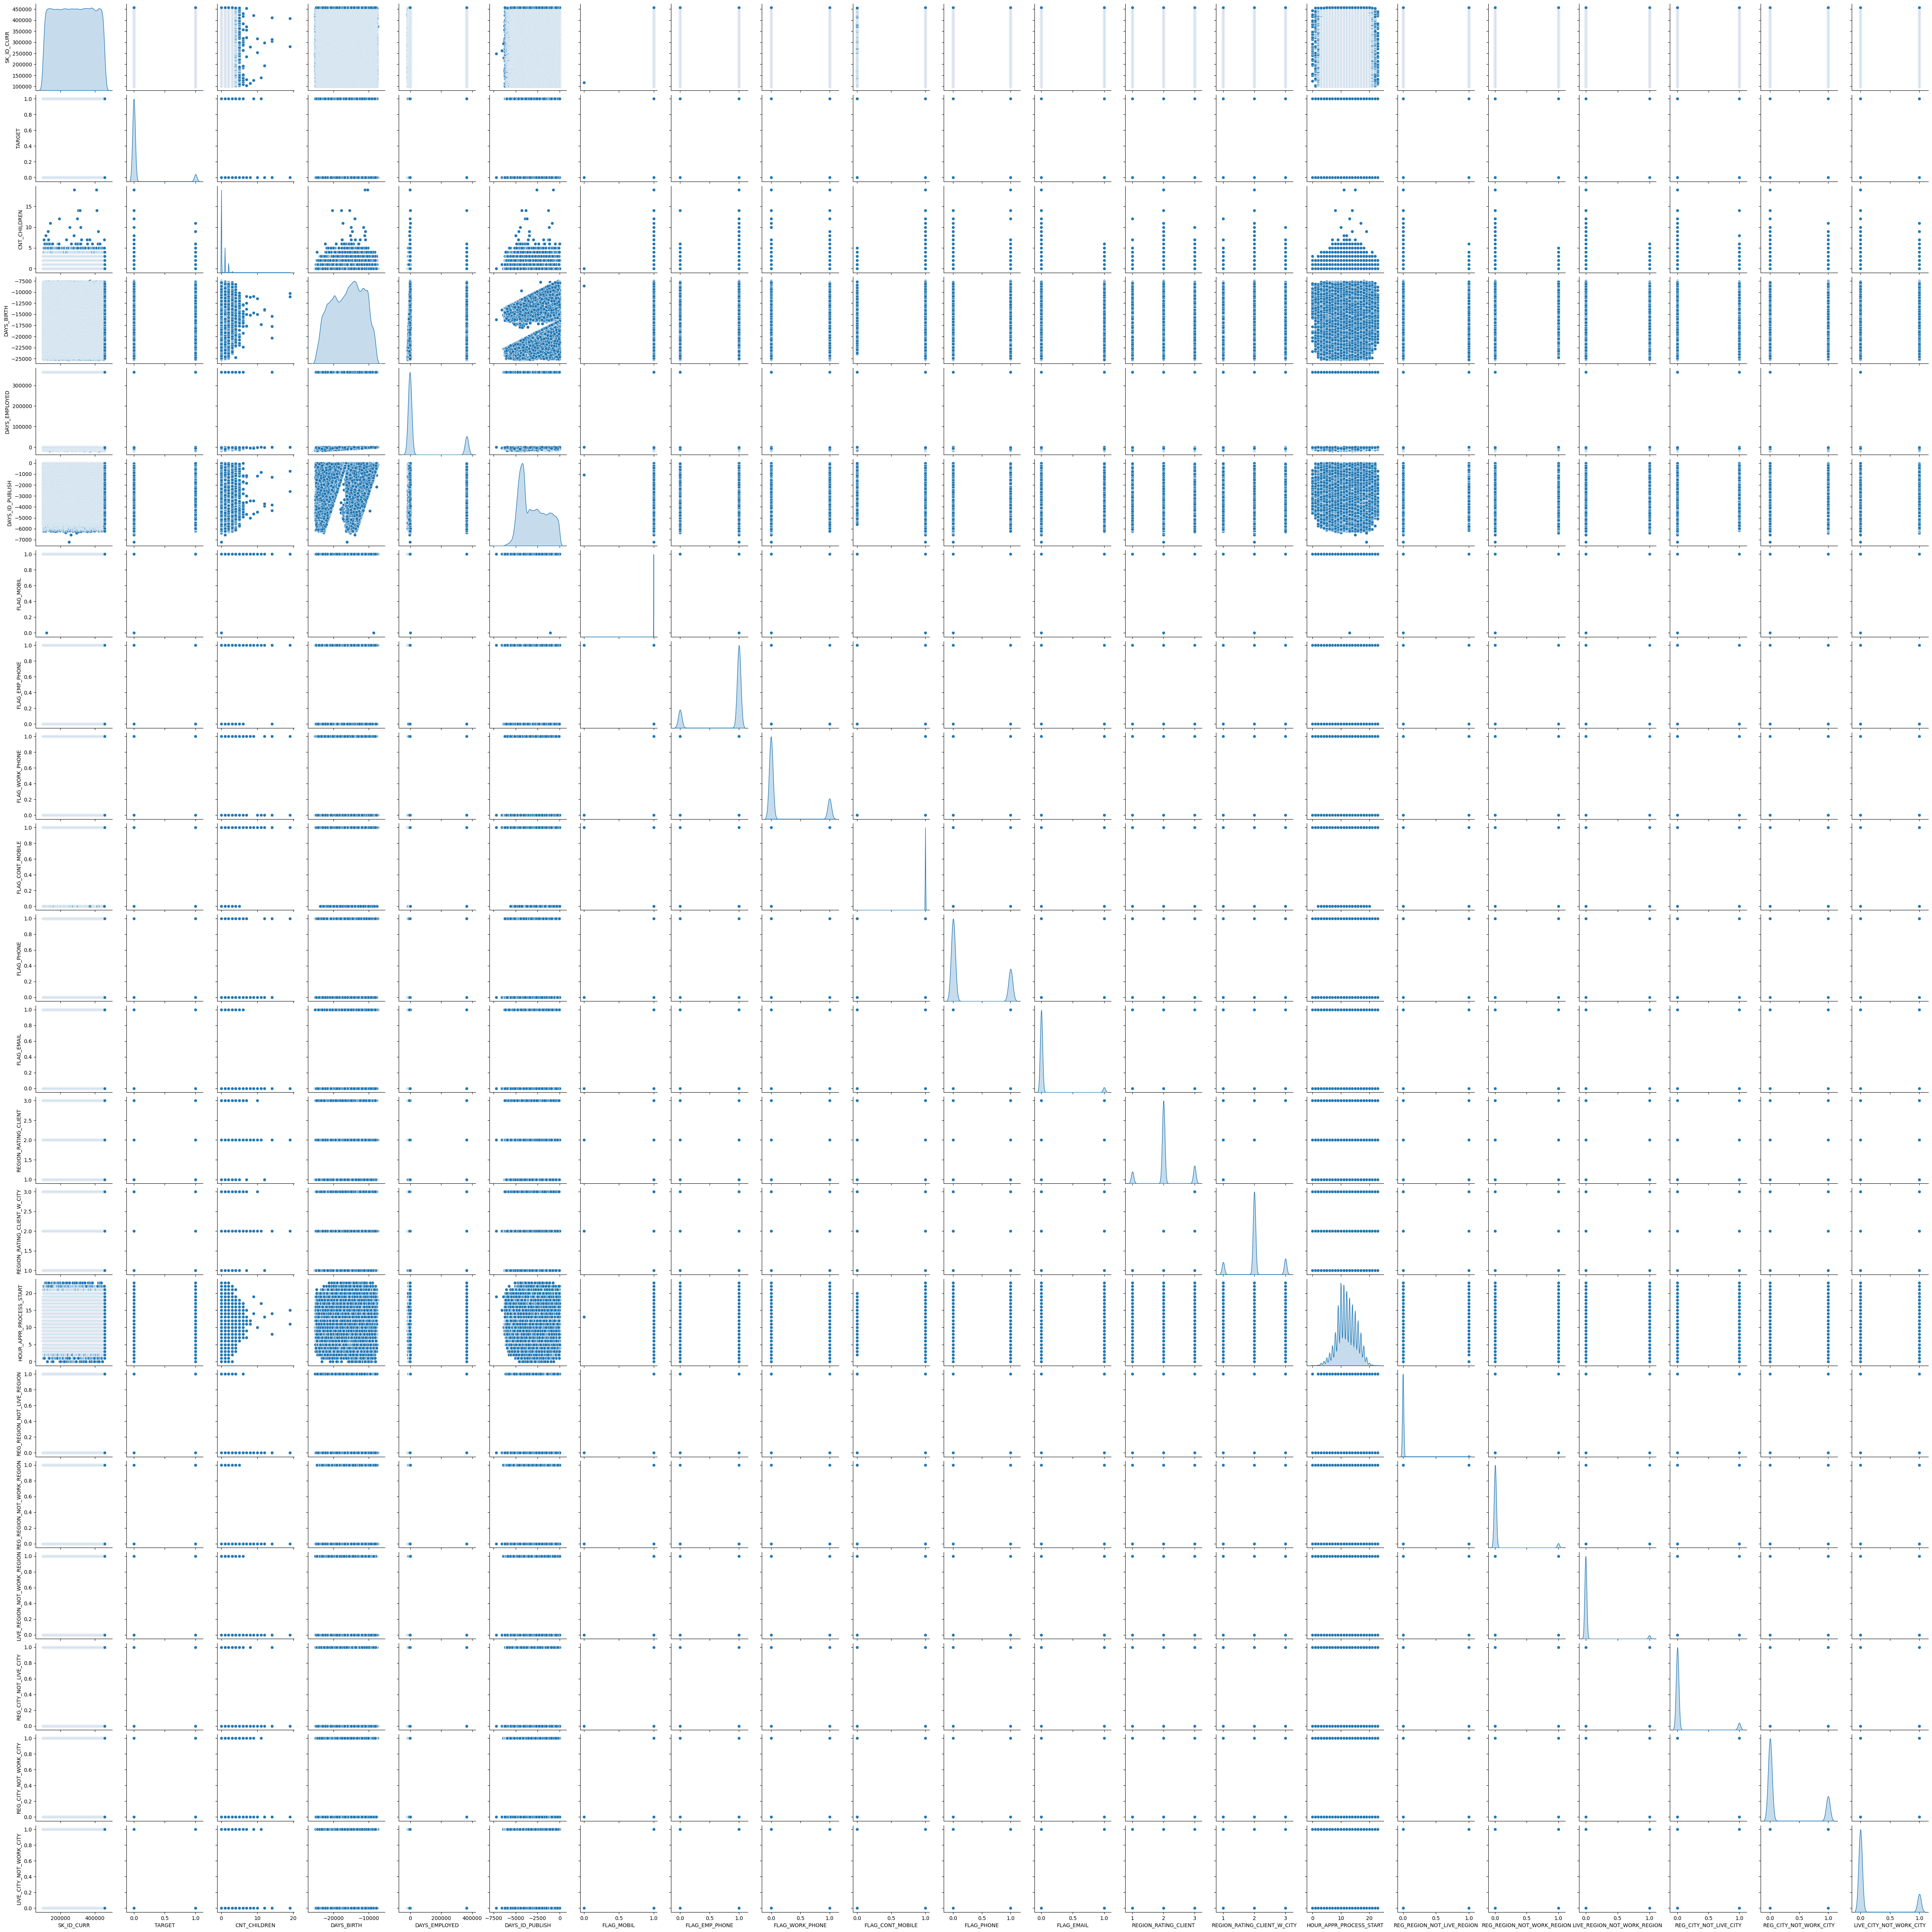

In [23]:
sns.pairplot(df[num], diag_kind='kde')

### 3.3.2 Non-Numerical Features

### 3.3.2.1 Categorical Columns vs Target Variable

In [24]:
df[cat].describe()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

In [25]:
cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

C:\Users\evind\AppData\Local\Temp\ipykernel_2744\3265989769.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df,x='TARGET',kind='kde',hue=df[i],height=2,aspect=2)
C:\Users\evind\AppData\Local\Temp\ipykernel_2744\3265989769.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df,x='TARGET',kind='kde',hue=df[i],height=2,aspect=2)
C:\Users\evind\AppData\Local\Temp\ipykernel_2744\3265989769.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df,x='TARGET',kind='kde',hue=df[i],height=2,aspect=2)


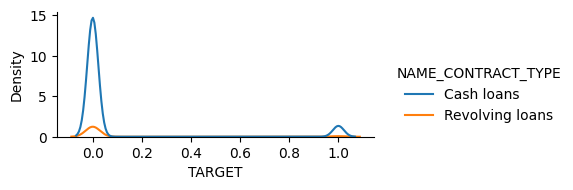

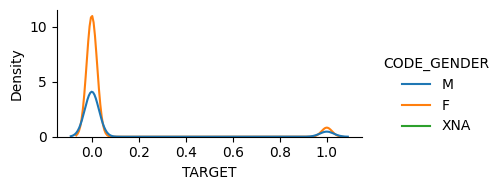

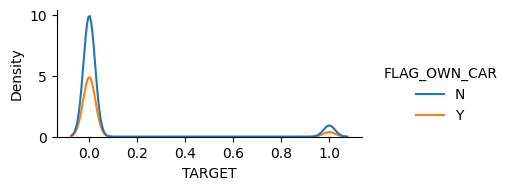

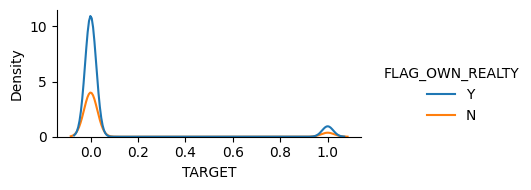

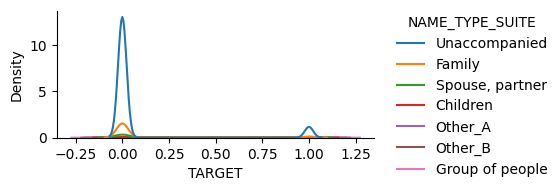

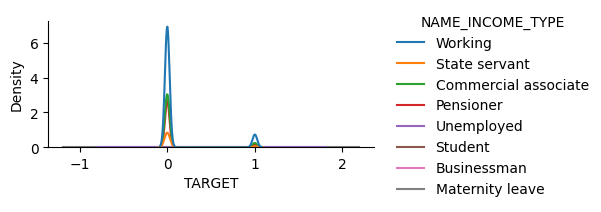

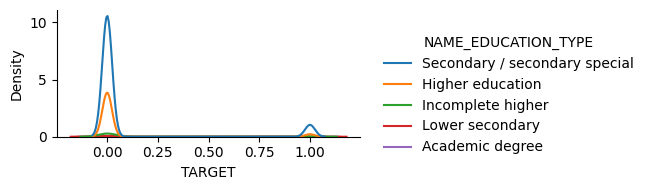

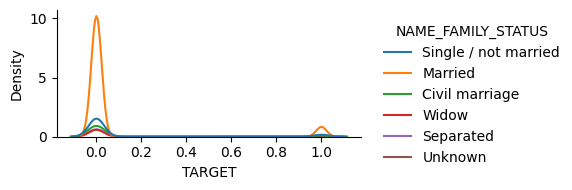

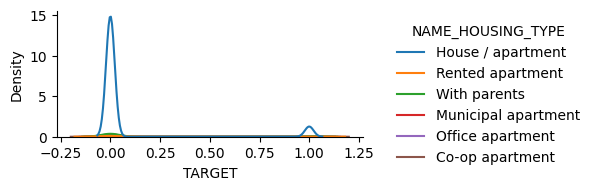

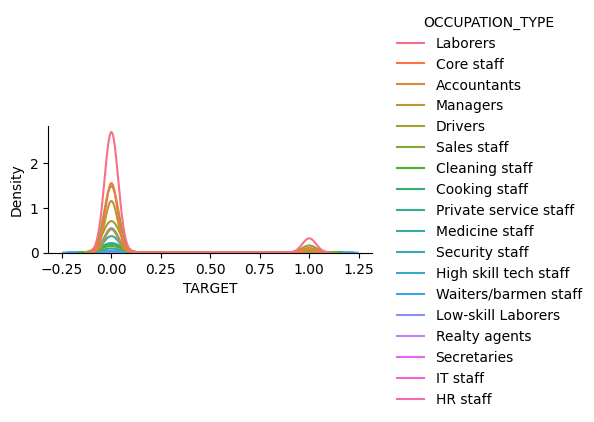

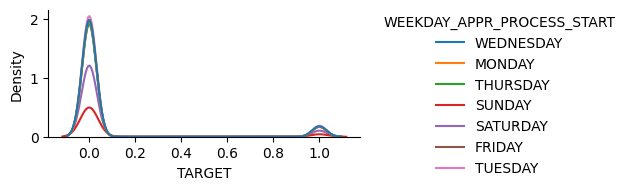

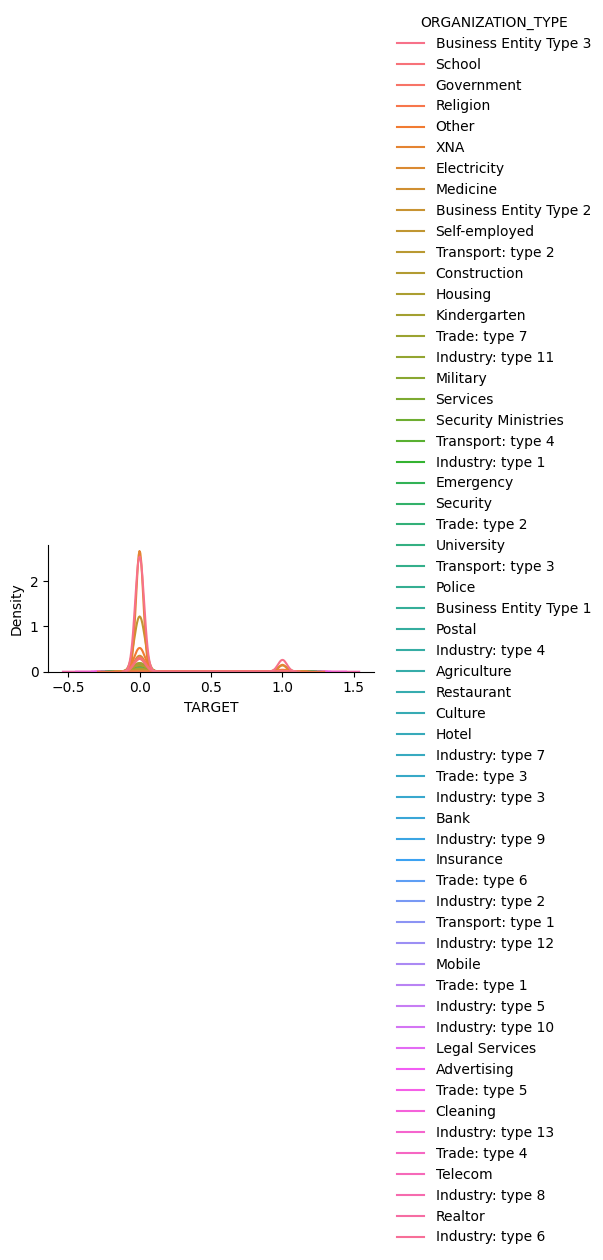

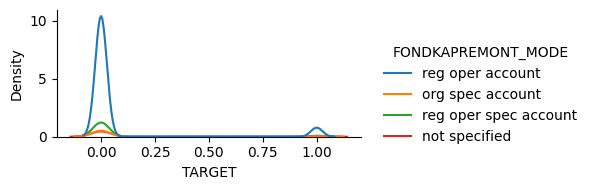

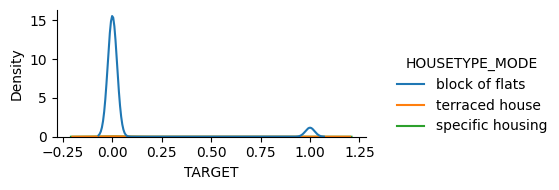

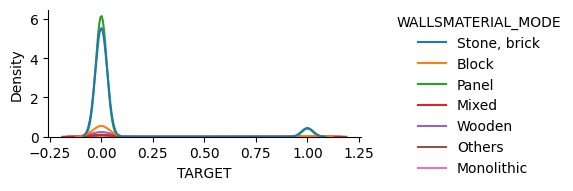

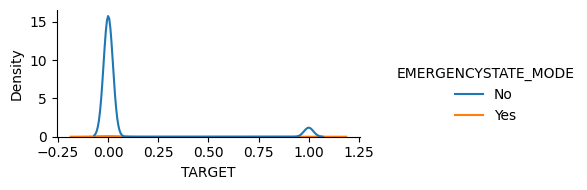

In [26]:
for i in cat:
    sns.displot(data=df,x='TARGET',kind='kde',hue=df[i],height=2,aspect=2)

<AxesSubplot: xlabel='TARGET', ylabel='Density'>

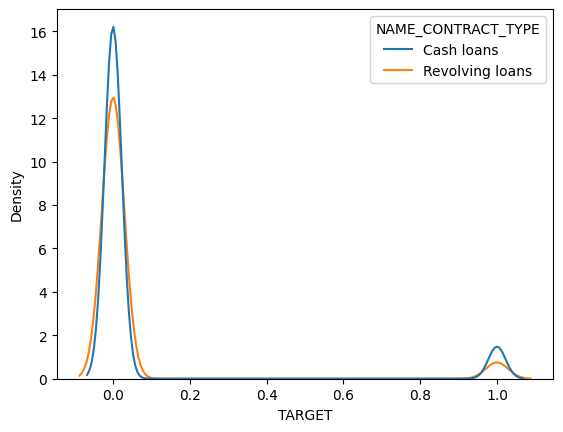

In [27]:
# normalization
sns.kdeplot(data=df,x='TARGET',hue='NAME_CONTRACT_TYPE',common_norm=False)

C:\Users\evind\AppData\Local\Temp\ipykernel_2744\2585358539.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df,x='TARGET',hue='CODE_GENDER',common_norm=False)


<AxesSubplot: xlabel='TARGET', ylabel='Density'>

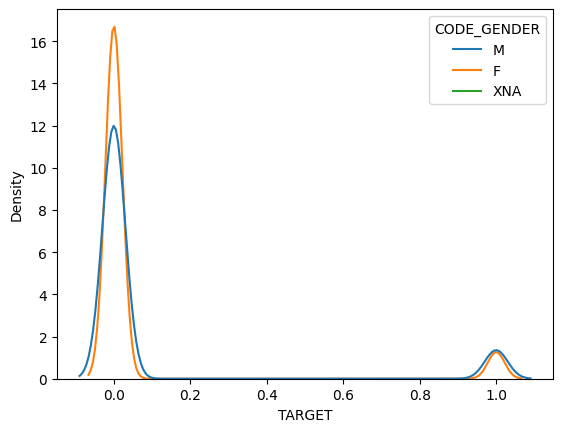

In [28]:
sns.kdeplot(data=df,x='TARGET',hue='CODE_GENDER',common_norm=False)

<AxesSubplot: xlabel='TARGET', ylabel='Density'>

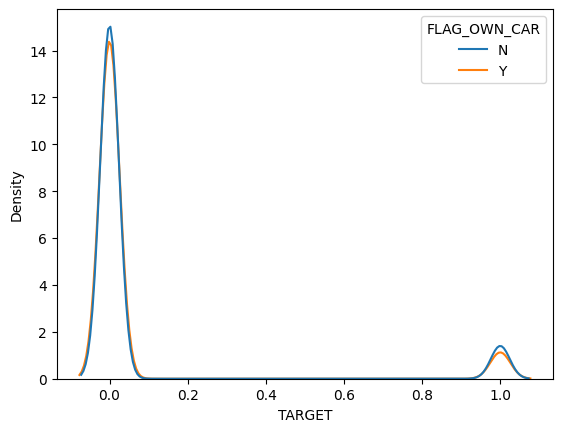

In [29]:
sns.kdeplot(data=df,x='TARGET',hue='FLAG_OWN_CAR',common_norm=False)

<AxesSubplot: xlabel='TARGET', ylabel='Density'>

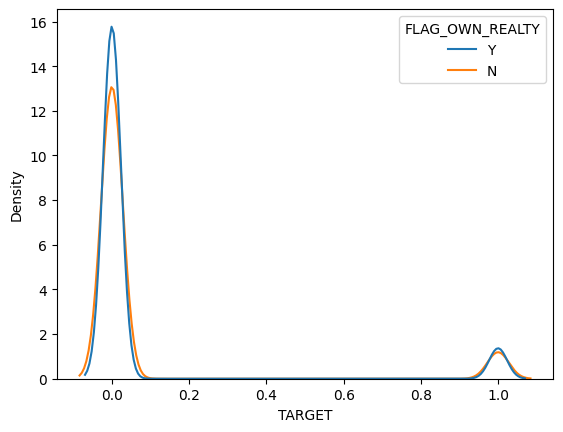

In [30]:
sns.kdeplot(data=df,x='TARGET',hue='FLAG_OWN_REALTY',common_norm=False)

<AxesSubplot: xlabel='TARGET', ylabel='Density'>

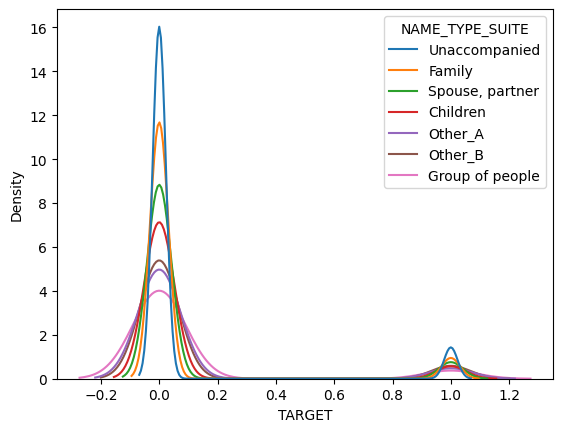

In [31]:
sns.kdeplot(data=df,x='TARGET',hue='NAME_TYPE_SUITE',common_norm=False)

C:\Users\evind\AppData\Local\Temp\ipykernel_2744\1097519436.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df,x='TARGET',hue='NAME_INCOME_TYPE',common_norm=False)


<AxesSubplot: xlabel='TARGET', ylabel='Density'>

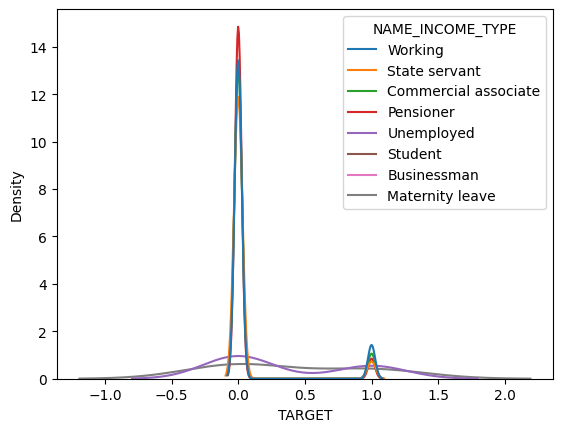

In [32]:
sns.kdeplot(data=df,x='TARGET',hue='NAME_INCOME_TYPE',common_norm=False)

<AxesSubplot: xlabel='TARGET', ylabel='Density'>

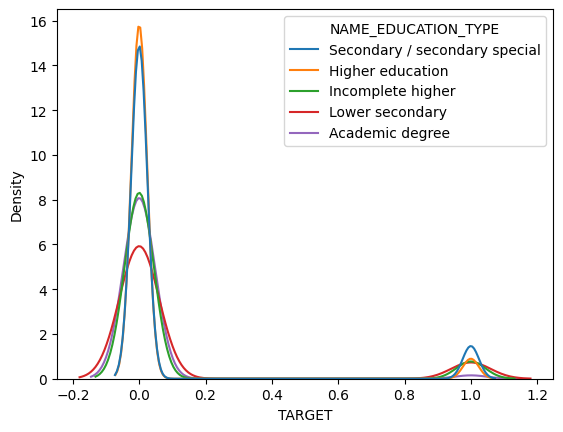

In [33]:
sns.kdeplot(data=df,x='TARGET',hue='NAME_EDUCATION_TYPE',common_norm=False)

C:\Users\evind\AppData\Local\Temp\ipykernel_2744\961782297.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df,x='TARGET',hue='NAME_FAMILY_STATUS',common_norm=False)


<AxesSubplot: xlabel='TARGET', ylabel='Density'>

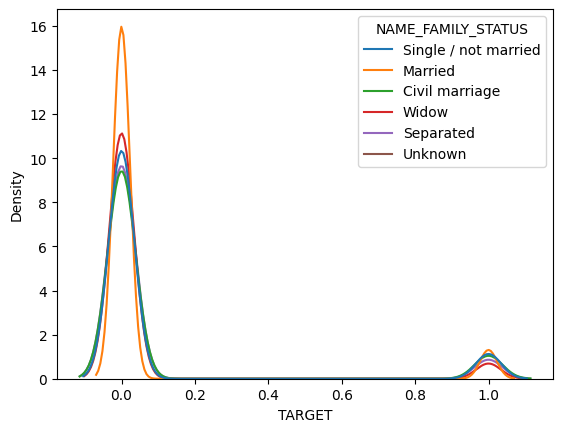

In [34]:
sns.kdeplot(data=df,x='TARGET',hue='NAME_FAMILY_STATUS',common_norm=False)

<AxesSubplot: xlabel='TARGET', ylabel='Density'>

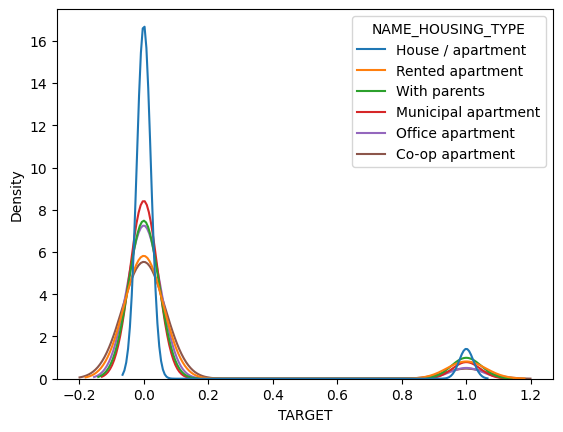

In [35]:
sns.kdeplot(data=df,x='TARGET',hue='NAME_HOUSING_TYPE',common_norm=False)

<AxesSubplot: xlabel='TARGET', ylabel='Density'>

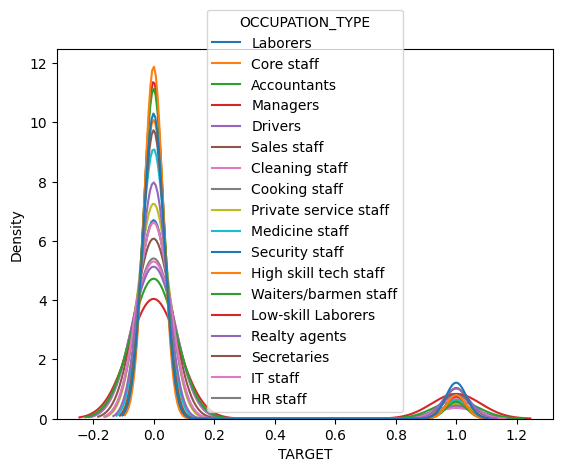

In [44]:
sns.kdeplot(data=df,x='TARGET',hue='OCCUPATION_TYPE',common_norm=False,palette="tab10")

<AxesSubplot: xlabel='TARGET', ylabel='Density'>

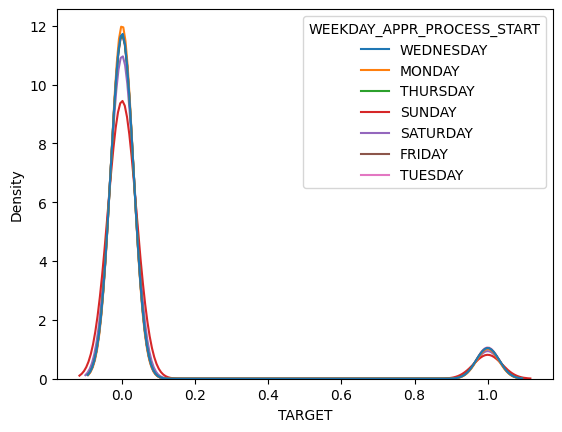

In [37]:
sns.kdeplot(data=df,x='TARGET',hue='WEEKDAY_APPR_PROCESS_START',common_norm=False)

<AxesSubplot: xlabel='TARGET', ylabel='Density'>

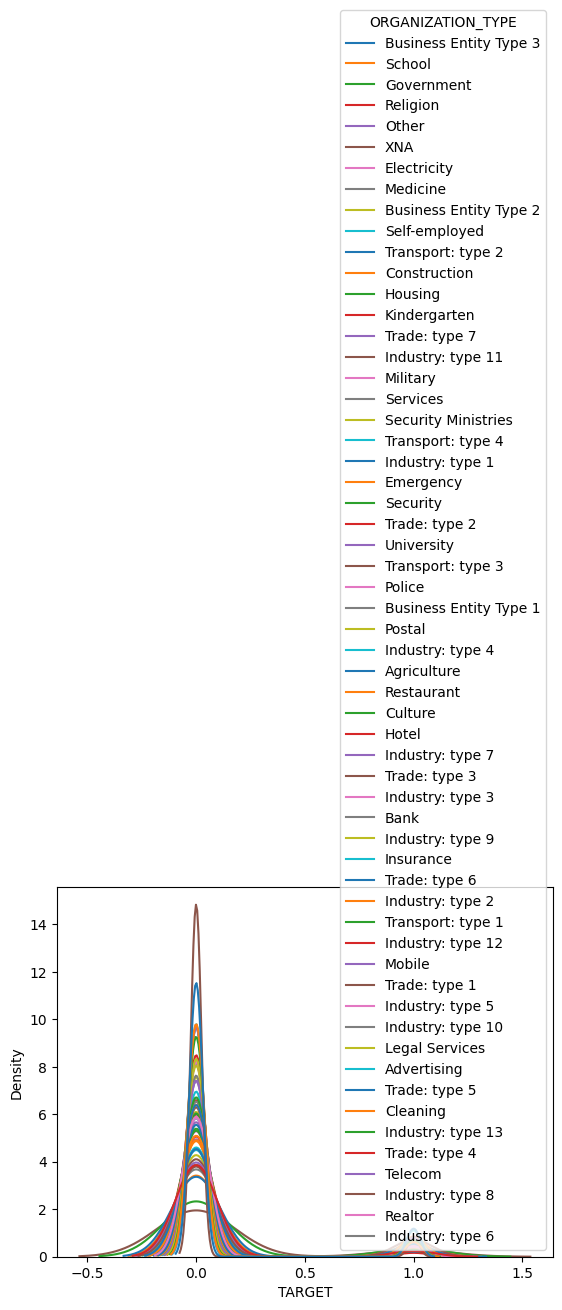

In [45]:
sns.kdeplot(data=df,x='TARGET',hue='ORGANIZATION_TYPE',common_norm=False,palette="tab10")

<AxesSubplot: xlabel='TARGET', ylabel='Density'>

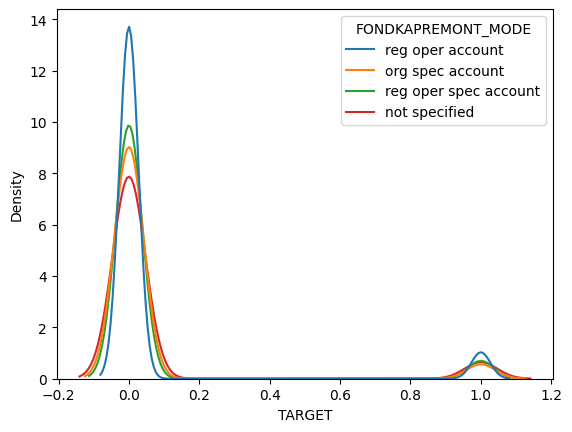

In [39]:
sns.kdeplot(data=df,x='TARGET',hue='FONDKAPREMONT_MODE',common_norm=False)

<AxesSubplot: xlabel='TARGET', ylabel='Density'>

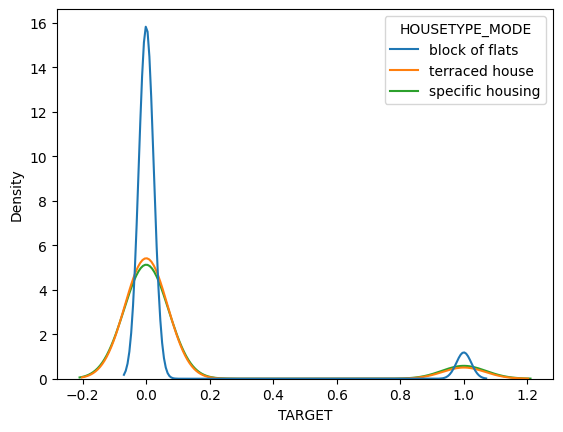

In [40]:
sns.kdeplot(data=df,x='TARGET',hue='HOUSETYPE_MODE',common_norm=False)

<AxesSubplot: xlabel='TARGET', ylabel='Density'>

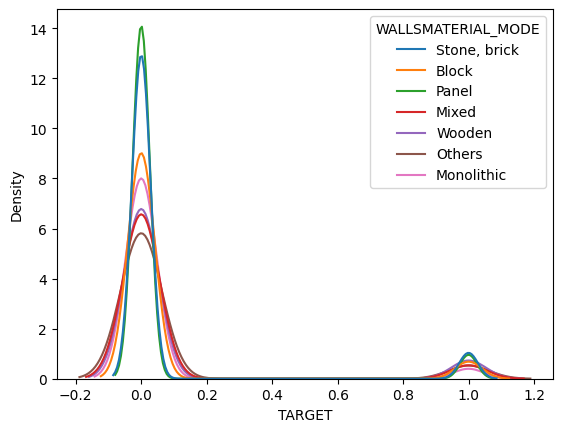

In [41]:
sns.kdeplot(data=df,x='TARGET',hue='WALLSMATERIAL_MODE',common_norm=False)

<AxesSubplot: xlabel='TARGET', ylabel='Density'>

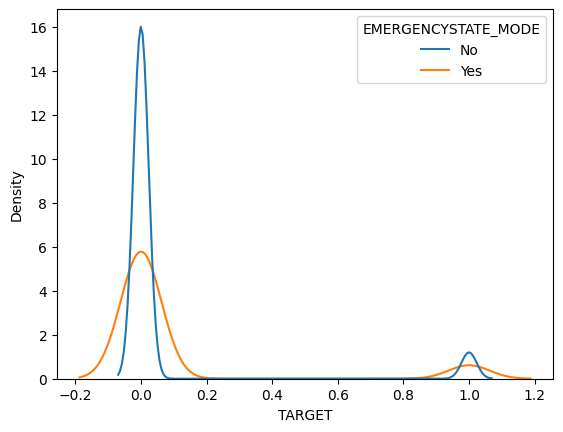

In [42]:
sns.kdeplot(data=df,x='TARGET',hue='EMERGENCYSTATE_MODE',common_norm=False)

**HASIL PENGAMATAN**<br>
- Pengajuan yg paling banyak adalah cash loans
- Banyak pengguna mendaftar pinjaman sendiri (tanpa pendamping)
- No Difficulty:
    - Perempuan
    - Pengguna yg tidak memiliki mobil
    - Pengguna yg memiliki rumah atau apartemen
    - Pensiunan (pensioner)
    - Customer yg memiliki pendidikan tinggi
    - Customer yg sudah menikah
    - Customer yg sudah memiliki rumah atau apartemen sendiri
    - Core staff, manager dan akuntan
- Difficulty:
    - Laki-laki
    - Pekerja (worker)
    - Customer yg memiliki pendidikan menengah (secondary education)
    - Laborer
- Hari apply sepertinya tidak berpengaruh terhadap target

## 3.4 Business Insight

### 3.4.1 Rentang umur customer saat melakukan loans

In [5]:
df['AGE'] = df.apply(lambda x: (abs(x['DAYS_BIRTH'])//365) if x['DAYS_BIRTH'] <= 0 else -1, axis=1)

In [6]:
def rentang_umur(x):
    if x >= 0 and x <= 15:
        return '0-15'
    elif x <= 30:
        return '16-30'
    elif x <= 45:
        return '31-45'
    elif x <= 60:
        return '46-60'
    else:
        return 'over 60'

In [7]:
df['RANGE_AGE'] = df['AGE'].apply(lambda x: rentang_umur(x))


In [8]:
# Agregasi
cnt_age =  df.groupby(['RANGE_AGE','TARGET']).agg({'SK_ID_CURR':'count',
                                    'AMT_INCOME_TOTAL':'mean',
                                    'AMT_CREDIT':'mean'})
cnt_age.columns = ['count_age', 'mean_income','mean_credit']
cnt_age.reset_index(inplace=True)
cnt_age

RANGE_AGE  TARGET  count_age    mean_income    mean_credit
0     16-30       0      46787  162546.347621  495670.673125
1     16-30       1       6019  150763.277953  465018.838594
2     31-45       0     112287  180725.735506  629840.287491
3     31-45       1      10827  178922.201995  573982.665004
4     46-60       0      95689  167998.135467  651361.308693
5     46-60       1       6534  164229.185262  619924.794077
6   over 60       0      27923  136880.878950  505615.436504
7   over 60       1       1445  133981.741869  541733.315917

In [9]:
a = cnt_age.groupby('RANGE_AGE')['count_age'].sum()
# print(a)
# print(a.index[1])
# print(a[1])
arr = []
for i in range(len(cnt_age)):
    for j in range(len(a)):
        if cnt_age['RANGE_AGE'][i] == a.index[j]:
            arr.append(cnt_age['count_age'][i]/a[j]*100)
cnt_age['Percentage'] = arr
cnt_age

RANGE_AGE  TARGET  count_age    mean_income    mean_credit  Percentage
0     16-30       0      46787  162546.347621  495670.673125   88.601674
1     16-30       1       6019  150763.277953  465018.838594   11.398326
2     31-45       0     112287  180725.735506  629840.287491   91.205712
3     31-45       1      10827  178922.201995  573982.665004    8.794288
4     46-60       0      95689  167998.135467  651361.308693   93.608092
5     46-60       1       6534  164229.185262  619924.794077    6.391908
6   over 60       0      27923  136880.878950  505615.436504   95.079679
7   over 60       1       1445  133981.741869  541733.315917    4.920321

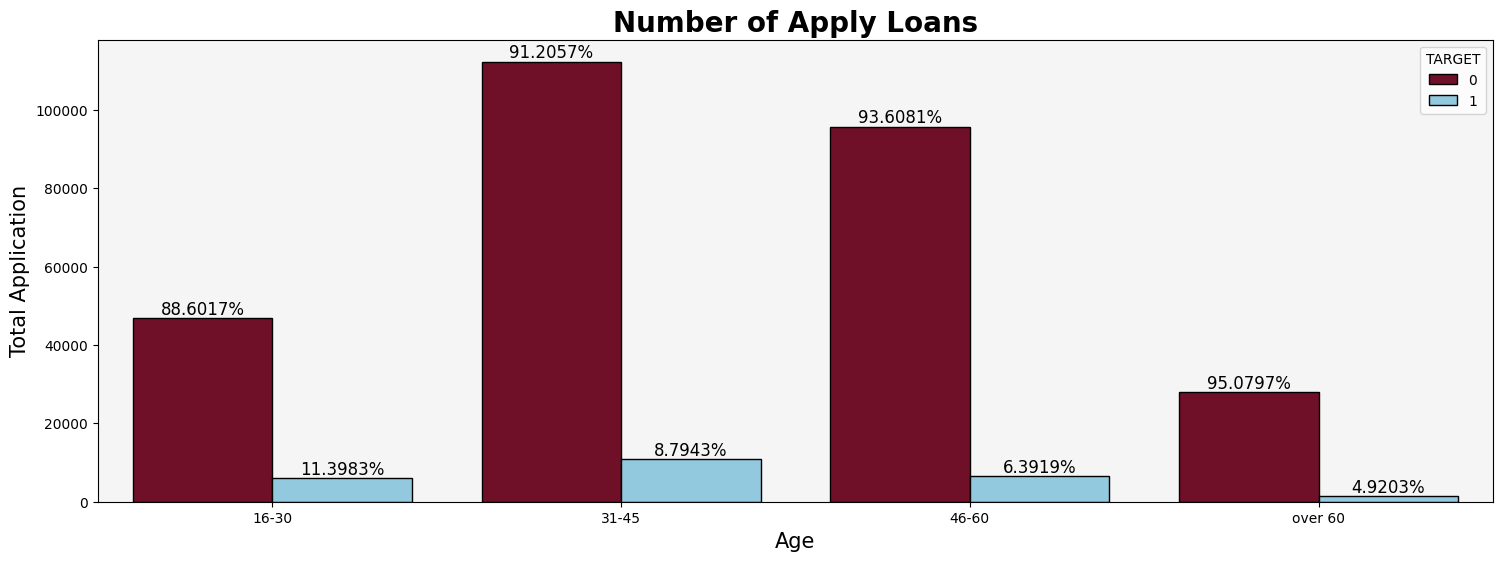

In [168]:
# plot jumlah penjualan mobil per tahun produksi
colors = ["#800020", "#87CEEB"]
customPalette = sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(18,6))

ax = sns.barplot(x='RANGE_AGE', y='count_age', hue='TARGET', data=cnt_age, edgecolor='black', palette=customPalette)

ax.set_facecolor("#F5F5F5")
i = 0
for p in ax.patches:
    if i <= 7:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%6.4f' % float(cnt_age['Percentage'][i])+'%', 
                fontsize=12, color='black', ha='center', va='bottom')
        if i == 6:
            i = -1
        i+=2
plt.title('Number of Apply Loans', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Total Application', fontsize=15);

**HASIL PENGAMATAN**<br>
Kebanyakan customer melakukan peminjaman adalah pada umur 31-45 tahun. Namun persentase paling tinggi dari nasabah yg membayar cicilan tepat waktu memiliki adalah rentang umur diatas 60 tahun. Dan nasabah pada umur 16 - 30 tahun rentan mengalami kesulitan pembayaran

### 3.4.2 Pendapatan customer (target vs income)

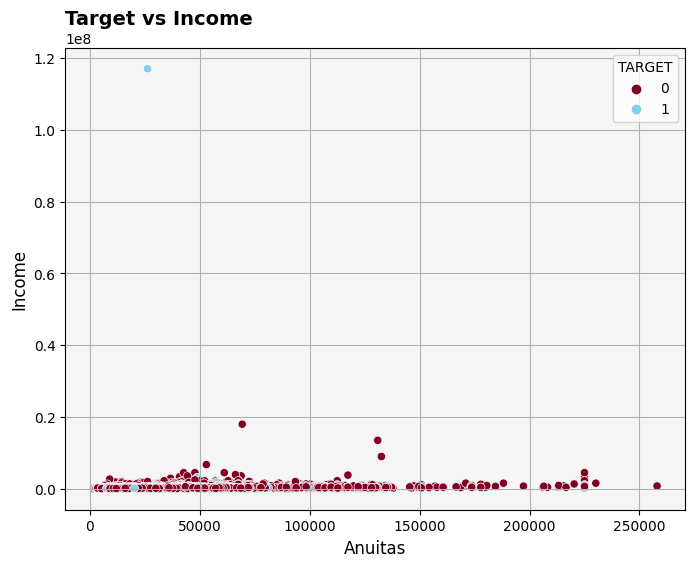

In [177]:
plt.figure(figsize=(8, 6))
plt.title('Target vs Income', loc='left', fontsize=14, fontweight='bold')
ax = sns.scatterplot(data=df, x='AMT_ANNUITY', y='AMT_INCOME_TOTAL', hue='TARGET')
ax.set_facecolor("#F5F5F5")
plt.xlabel('Anuitas', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.grid()
plt.show()

**HASIL PENGAMATAN**<br>
Meskipun pada umumnya orang dengan penghasilan tinggi dan cicilan yg dibayar jauh dibawah jumlah penghasilannya tidak memiliki kesulitan pembayaran, namun penghasilan tinggi dan jumlah cicilan rendah tidak menjamin customer dapat membayar cicilan tepat waktu, dibuktikan jumlah incomenya lebih dari 100 juta dan anuitasnya dibawah 50 ribu namun targetnya 1. Begitu juga banyak customer yg berpenghasilan rendah dan cicilan tinggi namun tidak memiliki masalah pembayaran (target = 0)

### 3.4.3 Top 5 pekerjaan yg tidak gagal bayar

In [180]:
occu = df['OCCUPATION_TYPE'].value_counts().reset_index().rename(columns={'index':'occupation','OCCUPATION_TYPE':'n_cust'})[:10]
occu

occupation  n_cust
0               Laborers   55186
1            Sales staff   32102
2             Core staff   27570
3               Managers   21371
4                Drivers   18603
5  High skill tech staff   11380
6            Accountants    9813
7         Medicine staff    8537
8         Security staff    6721
9          Cooking staff    5946

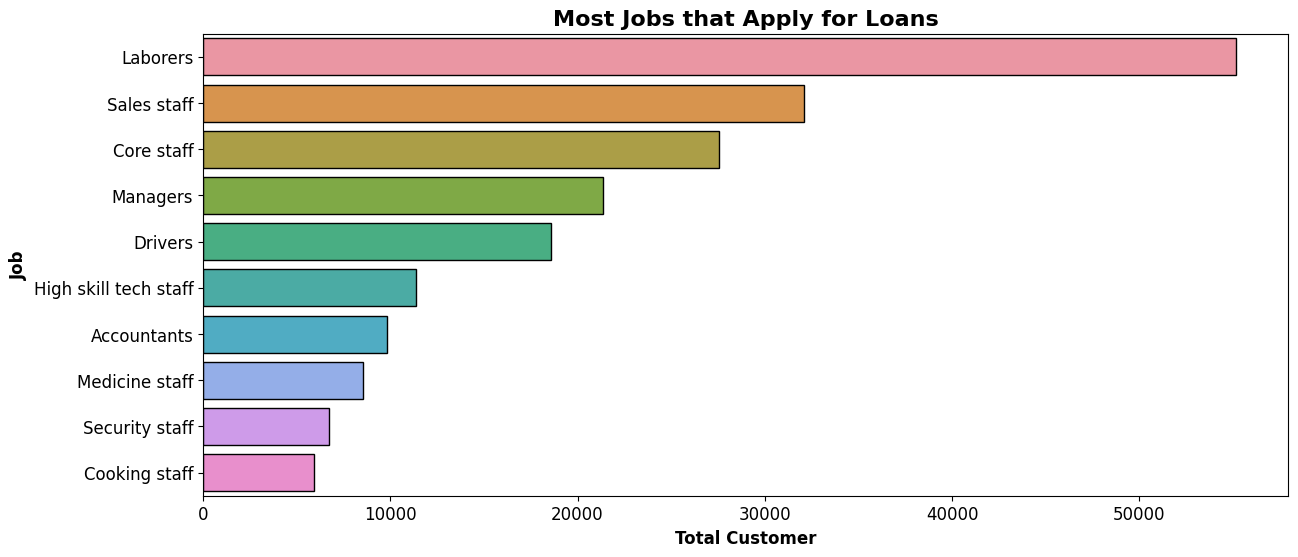

In [181]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x='n_cust', y='occupation', data=occu, edgecolor='black')

plt.title('Most Jobs that Apply for Loans', fontsize=16, fontweight='bold')
plt.xlabel('Total Customer', fontsize=14, fontweight='bold')
plt.ylabel('Job', fontsize=14, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

### 3.4.4 Jumlah pengajuan tiap hari (hue target)

In [190]:
day_apply = df.groupby(['WEEKDAY_APPR_PROCESS_START','CODE_GENDER']).agg({'SK_ID_CURR':'count'}).reset_index()
day_apply.rename(columns={'SK_ID_CURR':'n_apply'},inplace=True)
day_apply

WEEKDAY_APPR_PROCESS_START CODE_GENDER  n_apply
0                      FRIDAY           F    33322
1                      FRIDAY           M    17014
2                      FRIDAY         XNA        2
3                      MONDAY           F    33405
4                      MONDAY           M    17309
5                    SATURDAY           F    22131
6                    SATURDAY           M    11721
7                      SUNDAY           F    10412
8                      SUNDAY           M     5769
9                    THURSDAY           F    33367
10                   THURSDAY           M    17223
11                   THURSDAY         XNA        1
12                    TUESDAY           F    35443
13                    TUESDAY           M    18457
14                    TUESDAY         XNA        1
15                  WEDNESDAY           F    34368
16                  WEDNESDAY           M    17566

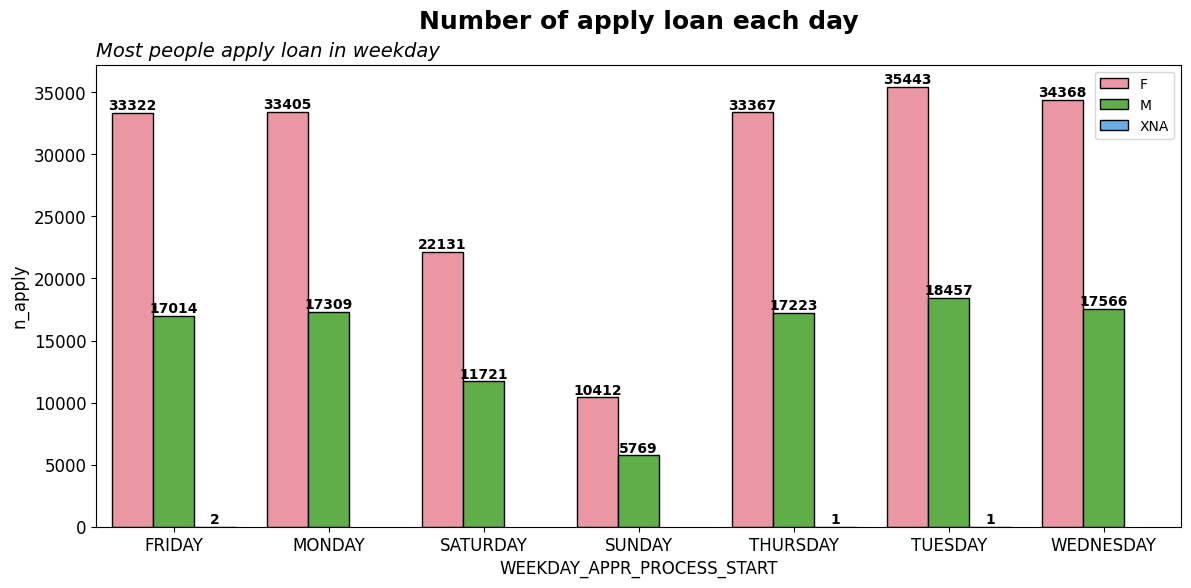

In [193]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='WEEKDAY_APPR_PROCESS_START', y='n_apply', data=day_apply, edgecolor='black',
                 hue='CODE_GENDER')
plt.legend(loc='upper right')

plt.title('Number of apply loan each day\n', fontsize=18, fontweight='bold')
plt.title('Most people apply loan in weekday', loc='left',
          fontsize=14, fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

for label in ax.containers:
    ax.bar_label(label, fontweight='bold')

**HASIL PENGAMATAN**<br>
Kebanyakan customer melakukan pengajuan peminjaman pada saat hari senin-jum'at. Dan kebanyakan dari customer yg melakukan peminjaman adalah perempuan

### 3.4.5 Rating Kota vs Income

In [199]:
rate_city = df.groupby(['REGION_RATING_CLIENT_W_CITY','TARGET'])['AMT_INCOME_TOTAL'].mean().reset_index()
rate_city

REGION_RATING_CLIENT_W_CITY  TARGET  AMT_INCOME_TOTAL
0                            1       0     242521.026605
1                            1       1     228136.962515
2                            2       0     161349.376496
3                            2       1     165859.805283
4                            3       0     149654.821626
5                            3       1     144031.347031

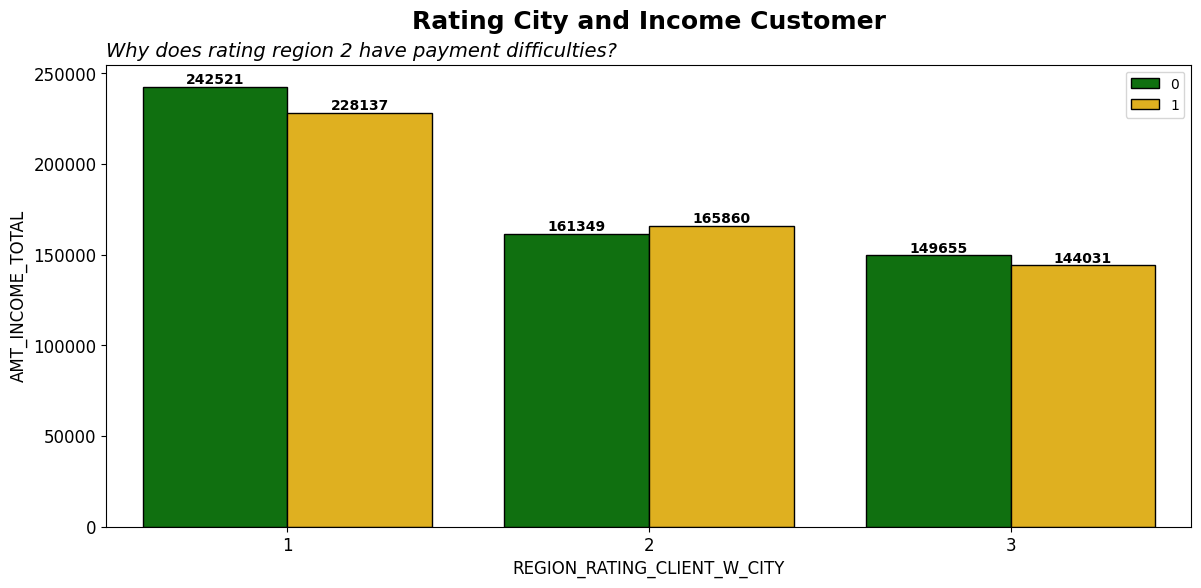

In [202]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='REGION_RATING_CLIENT_W_CITY', y='AMT_INCOME_TOTAL', data=rate_city, edgecolor='black',
                 hue='TARGET')
plt.legend(loc='upper right')

plt.title('Rating City and Income Customer\n', fontsize=18, fontweight='bold')
plt.title('Why does rating region 2 have payment difficulties?', loc='left',
          fontsize=14, fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

for label in ax.containers:
    ax.bar_label(label, fontweight='bold')

### 3.4.6 Jumlah Anak vs Income

In [221]:
n_chil = df.groupby(['CNT_CHILDREN','TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
n_chil.rename(columns={'SK_ID_CURR':'n_chil'},inplace=True)
print(n_chil)
n_anak = list(n_chil['CNT_CHILDREN'].unique())
n_0 = n_chil[n_chil['TARGET']==0]
n_0 = list(n_0['n_chil'])
n_1 = n_chil[n_chil['TARGET']==1]
n_1 = list(n_1['n_chil'])
print(n_anak)
print(n_0)
print(n_1)
# data_anak = pd.DataFrame({'0':n_0,'1':n_1}, index=n_anak)
# data_anak

    CNT_CHILDREN  TARGET  n_chil
0              0       0  198762
1              0       1   16609
2              1       0   55665
3              1       1    5454
4              2       0   24416
5              2       1    2333
6              3       0    3359
7              3       1     358
8              4       0     374
9              4       1      55
10             5       0      77
11             5       1       7
12             6       0      15
13             6       1       6
14             7       0       7
15             8       0       2
16             9       1       2
17            10       0       2
18            11       1       1
19            12       0       2
20            14       0       3
21            19       0       2
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 19]
[198762, 55665, 24416, 3359, 374, 77, 15, 7, 2, 2, 2, 3, 2]
[16609, 5454, 2333, 358, 55, 7, 6, 2, 1]


In [206]:
students = pd.DataFrame({'Boys': [67, 78],
                         'Girls': [72, 80], },
                        index=['First Year', 'Second Year'])
students

Boys  Girls
First Year     67     72
Second Year    78     80

Text(0, 0.5, 'Percentage Ranges')

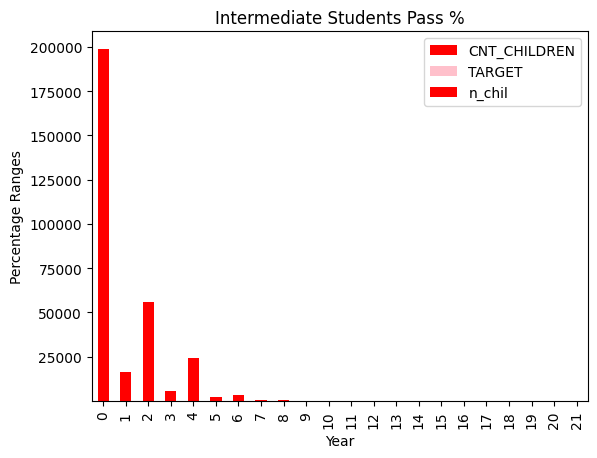

In [204]:
# create stacked bar chart for students DataFrame
data_anak.plot(kind='bar', stacked=True, color=['red', 'pink'])
 
# Add Title and Labels
plt.title('Intermediate Students Pass %')
plt.xlabel('Year')
plt.ylabel('Percentage Ranges')

# **4. Data Processing**

## 4.1 Handling Duplicate Data

In [10]:
df.duplicated().sum()

0

## 4.2 Handling Missing Value

In [11]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  \
0           24700.5  ...                       0                      0   
1           35698.5  ...                       0                      0   
2            6750.0  ...                       0                      0   
3           29686.5  ...                       0                      0   
4           21865.5  ...                       0                      1   
...             ...  ...                     ...                    ...   
307506      27558.0  ...                       0                      0   
307507      12001.5  ...                       0                      0   
307508      29979.0  ...                       0                      1   
307509      20205.0  ...                       1                      1   
307510      49117.5  ...                       0                      1   

       LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
0                            0  Business Entity Type 3   reg oper account   
1                            0                  School   reg oper account   
2                            0              Government                NaN   
3                            0  Business Entity Type 3                NaN   
4                            1                Religion                NaN   
...                        ...                     ...                ...   
307506                       0                Services   reg oper account   
307507                       0                     XNA   reg oper account   
307508                       1                  School   reg oper account   
307509                       0  Business Entity Type 1                NaN   
307510                       1  Business Entity Type 3                NaN   

        HOUSETYPE_MODE  WALLSMATERIAL_MODE  EMERGENCYSTATE_MODE  AGE  \
0       block of flats        Stone, brick                   No   25   
1       block of flats               Block                   No   45   
2                  NaN                 NaN                  NaN   52   
3                  NaN                 NaN                  NaN   52   
4                  NaN                 NaN                  NaN   54   
...                .

### 4.2.1 Drop Missing Values

In [12]:
df_new = df.drop(['WEEKDAY_APPR_PROCESS_START','OWN_CAR_AGE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','REGION_RATING_CLIENT','REG_CITY_NOT_WORK_CITY','FLAG_EMP_PHONE','REG_CITY_NOT_WORK_CITY'], axis=1)
df_new

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0           24700.5  ...                   WEDNESDAY                      10   
1           35698.5  ...                      MONDAY                      11   
2            6750.0  ...                      MONDAY                       9   
3           29686.5  ...                   WEDNESDAY                      17   
4           21865.5  ...                    THURSDAY                      11   
...             ...  ...                         ...                     ...   
307506      27558.0  ...                    THURSDAY                      15   
307507      12001.5  ...                      MONDAY                       8   
307508      29979.0  ...                    THURSDAY                       9   
307509      20205.0  ...                   WEDNESDAY                       9   
307510      49117.5  ...                    THURSDAY                      20   

       REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
307506                          0                          0   
307507                          0                          0   
307508                          0                          0   
307509                          0                          0   
307510                          0                          0   

       LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                      0   
...                            ...                    ...   
307506                           0                      0   
307507                           0                      0   

In [13]:
cek = df_new.isnull().sum()
cek

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
C

### 4.2.2 Fill Missing Value

In [14]:
# after filling missing value
print(cek.to_dict())

{'SK_ID_CURR': 0, 'TARGET': 0, 'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 12, 'AMT_GOODS_PRICE': 278, 'NAME_TYPE_SUITE': 1292, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 0, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 0, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 0, 'FLAG_MOBIL': 0, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 96391, 'CNT_FAM_MEMBERS': 2, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY': 0, 'ORGANIZATION_TYPE': 0, 'AGE': 0, 'RANGE_AGE': 0}


In [15]:
# after filling missing value
cek_dict = cek.to_dict()
for i in cek_dict.keys():
    if cek_dict[i] > 0:
        df_new[i] = df_new[i].fillna(df_new[i].mode()[0])
        df_new[i].isnull().sum()


In [16]:
df_new.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_

## 4.3 Recategorization High Cardinality in Categorical Features

In [17]:
df_new['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Drivers',
       'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [18]:
def occu_category(x): 
    if x['OCCUPATION_TYPE'] in ['Laborers','Low-skill Laborers']: 
        occu = 'Laborers'
    elif x['OCCUPATION_TYPE'] in ['High skill tech staff', 'IT staff']:
        occu = 'Tech Staff'
    elif x['OCCUPATION_TYPE'] in ['Cleaning staff', 'Cooking staff','Waiters/barmen staff']:
        occu = 'Waiters Staff'
    elif x['OCCUPATION_TYPE'] in ['Sales staff', 'Realty agents']:
        occu = 'Sales & Realty Staff'
    elif x['OCCUPATION_TYPE'] in ['Accountants', 'Secretaries','HR staff']:
        occu = 'Office Staff'
    elif x['OCCUPATION_TYPE'] == 'Core staff':
        occu = 'Core Staff'
    elif x['OCCUPATION_TYPE'] == 'Managers':
        occu = 'Managers'
    elif x['OCCUPATION_TYPE'] == 'Drivers':
        occu = 'Drivers'
    elif x['OCCUPATION_TYPE'] == 'Private service staff':
        occu = 'Private Service Staff'
    elif x['OCCUPATION_TYPE'] == 'Medicine staff':
        occu = 'Medicine Staff'
    elif x['OCCUPATION_TYPE'] == 'Security staff':
        occu = 'Security Staff'
    return occu
    


In [19]:
# Membuat kolom baru yaitu kolom color_new menggunakan fungsi color_category
df_new['occupation_new'] = df_new.apply(lambda x: occu_category(x), axis=1)

In [20]:
df_new['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [21]:
def org_category(x): 
    org_type = x['ORGANIZATION_TYPE'].lower()
    org_type = org_type.split(' ')
    if 'type' not in org_type:
        return x['ORGANIZATION_TYPE'].lower()
    idx_search = org_type.index('type')
    result = "  ".join(org_type[:idx_search])
    result = result.replace(':','').strip()
    return result

In [22]:
# Membuat kolom baru yaitu kolom color_new menggunakan fungsi color_category
df_new['organization_new'] = df_new.apply(lambda x: org_category(x), axis=1)

In [23]:
df_new

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  REG_REGION_NOT_LIVE_REGION  \
0           24700.5  ...                           0   
1           35698.5  ...                           0   
2            6750.0  ...                           0   
3           29686.5  ...                           0   
4           21865.5  ...                           0   
...             ...  ...                         ...   
307506      27558.0  ...                           0   
307507      12001.5  ...                           0   
307508      29979.0  ...                           0   
307509      20205.0  ...                           0   
307510      49117.5  ...                           0   

       REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                               0                           0   
1                               0                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   
...                           ...                         ...   
307506                          0                           0   
307507                          0                           0   
307508                          0                           0   
307509                          0                           0   
307510                          0                           0   

       REG_CITY_NOT_LIVE_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                           0                       0  Business Entity Type 3   
1                           0                       0                  School   
2                           0                       0              Government   
3                           0                       0  Business Entity Type 3   
4                           0                       1                Religion   
...                       ...                     ...                     ...   
307506                      0                       0                Services   
307507                      0                       0                     XNA   
307508                      0                       1                  School   
307509        

In [24]:
list(df_new.select_dtypes(include='object'))

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'RANGE_AGE',
 'occupation_new',
 'organization_new']

In [25]:
df_new['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', 'Other_B', 'Group of people'], dtype=object)

In [26]:
def type_suite_category(x): 
    if x['NAME_TYPE_SUITE'] in ['Family','Spouse, partner','Children']: 
        suite = 'Family'
    elif x['NAME_TYPE_SUITE'] in ['Other_A', 'Other_B','Group of people']:
        suite = 'Other'
    else:
        suite = 'Unaccompanied'
    return suite
df_new['NAME_TYPE_SUITE_new'] = df_new.apply(lambda x: type_suite_category(x), axis=1)

In [27]:
df_new['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [28]:
def type_income_category(x): 
    if x['NAME_INCOME_TYPE'] in ['Working','State servant','Commercial associate','Businessman','Maternity leave']: 
        income = 'Working'
    elif x['NAME_INCOME_TYPE'] == 'Pensioner':
        income = 'Pensioner'
    elif x['NAME_INCOME_TYPE'] == 'Student':
        income = 'Student'
    else:
        income = 'Unemployed'
    return income
df_new['NAME_INCOME_TYPE_new'] = df_new.apply(lambda x: type_income_category(x), axis=1)

In [29]:
df_new['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [30]:
def fam_stat_category(x): 
    if x['NAME_FAMILY_STATUS'] in ['Single / not married','Widow','Separated']: 
        fam_stat = 'Single'
    elif x['NAME_FAMILY_STATUS'] in ['Married','Civil marriage']:
        fam_stat = 'Married'
    else:
        fam_stat = 'Unknown'
    return fam_stat
df_new['NAME_FAMILY_STATUS_new'] = df_new.apply(lambda x: fam_stat_category(x), axis=1)

## 4.4 Handling Anomaly Values

In [23]:
df_new['DAYS_EMPLOYED'].max()

365243

In [24]:
df_new['DAS_EMPLOYED_NEW'] = df_new.apply(lambda x: (abs(x['DAYS_EMPLOYED'])//365) if x['DAYS_EMPLOYED'] <= 0 else -1, axis=1)

In [26]:
df_new

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  REG_REGION_NOT_WORK_REGION  \
0           24700.5  ...                           0   
1           35698.5  ...                           0   
2            6750.0  ...                           0   
3           29686.5  ...                           0   
4           21865.5  ...                           0   
...             ...  ...                         ...   
307506      27558.0  ...                           0   
307507      12001.5  ...                           0   
307508      29979.0  ...                           0   
307509      20205.0  ...                           0   
307510      49117.5  ...                           0   

       LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                      0   
...                            ...                    ...   
307506                           0                      0   
307507                           0                      0   
307508                           0                      0   
307509                           0                      1   
307510                           0                      0   

       LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE AGE  RANGE_AGE  \
0                            0  Business Entity Type 3  25      16-30   
1                            0                  School  45      31-45   
2                            0              Government  52      46-60   
3                            0  Business Entity Type 3  52      46-60   
4                            1                Religion  54      46-60   
...                        ...                     ...  ..        ...   
307506                       0                Services  25      16-30   
307507                       0                     XNA  56      46-60   
307508                       1                  School  41      31-45   
307509                       0  Business Entity Type 1  32      31-45   
307510                       1  Business Entity Type 3  46      46-60

## 4.5. Feature Transformation <br>
Log Transformation pada feature odometer. Kami melakukan transoformasi terlebih dulu sebelum melakukan handling outlier. Jika kita melakukan handling outlier terlebih dulu, maka kemungkinan data yang akan dibuang lebih banyak. Oleh karena itu, kami melakukan log transformation terlebih dulu dengan harapan data semakin terdistribusi dengan normal sehingga data yang terindikasi outlier lebih sedikit.

### 4.5.1 Transformasi dengan Pangkat 1/3

In [33]:
# CNT_CHILDREN
df_new['nchil_pow'] = df_new['CNT_CHILDREN'].apply(lambda x : x**(1/3))
print('Skew value CNT_CHILDREN:', df_new['nchil_pow'].skew())
# DAYS_EMPLOYED
df_new['demployed_pow'] = df_new['DAYS_EMPLOYED'].apply(lambda x : x**(1/3))
print('Skew value DAYS_EMPLOYED:', df_new['demployed_pow'].skew())
# HOUR_APPR_PROCESS_START
df_new['hour_process_pow'] = df_new['HOUR_APPR_PROCESS_START'].apply(lambda x : x**(1/3))
print('Skew value HOUR_APPR_PROCESS_START:', df_new['hour_process_pow'].skew())

Skew value CNT_CHILDREN: 0.9596604778199966
Skew value DAYS_EMPLOYED: 1.6450003117432004
Skew value HOUR_APPR_PROCESS_START: -0.8249771357396941


C:\Users\evind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\nanops.py:1197: ComplexWarning: Casting complex values to real discards the imaginary part
  values = values.astype("f8")


### 4.5.2 PowerTransformer <br>

In [34]:
from sklearn.preprocessing import PowerTransformer
# CNT_CHILDREN
df_new['nchil_pt'] = PowerTransformer().fit_transform(df_new['CNT_CHILDREN'].values.reshape(len(df_new), 1))
print('Skew value CNT_CHILDREN:', df_new['nchil_pt'].skew())
# DAYS_EMPLOYED
df_new['demployed_pt'] = PowerTransformer().fit_transform(df_new['DAYS_EMPLOYED'].values.reshape(len(df_new), 1))
print('Skew value DAYS_EMPLOYED:', df_new['demployed_pt'].skew())
# HOUR_APPR_PROCESS_START
df_new['hour_process_pt'] = PowerTransformer().fit_transform(df_new['HOUR_APPR_PROCESS_START'].values.reshape(len(df_new), 1))
print('Skew value HOUR_APPR_PROCESS_START:', df_new['hour_process_pt'].skew())

Skew value CNT_CHILDREN: 0.8843917616006275
Skew value DAYS_EMPLOYED: -1.4442082361099744
Skew value HOUR_APPR_PROCESS_START: -0.013834761342874405


In [36]:
# Drop kolom age_pow
df_new = df_new.drop(['nchil_pow','demployed_pow','hour_process_pow'],axis=1)

## 4.6. Handling Outliers <br>
Handling outlier dilakukan pada kolom `CNT_CHILDREN`,`DAYS_EMPLOYED` dan `HOUR_APPR_PROCESS_START`.

In [40]:
rows_before_filt = len(df_new)
print('Jumlah Baris sebelum filter:', rows_before_filt, '\n')

Jumlah Baris sebelum filter: 307511 



In [45]:
# Handling outlier dengan z-score
cols = ['nchil_pt','demployed_pt','hour_process_pt']

filtered_entries = np.array([True] * len(df_new))

for col in cols:
    zscore = abs(stats.zscore(df_new[col]))                       # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries        # keep yang kurang dari 3 absolute z-scorenya
    
df_new = df_new[filtered_entries]                                     # filter, cuma ambil yang z-scorenya dibawah 3

# Total baris yang dibuang
rows_after_filt = len(df_new)
diff = round((rows_before_filt - rows_after_filt) / rows_before_filt * 100, 2)
print(f'Jumlah baris setelah memfilter outlier: {len(df_new)}')
print(f'Persentase outlier yang dibuang:', diff)

Jumlah baris setelah memfilter outlier: 301235
Persentase outlier yang dibuang: 2.04


In [46]:
df_new

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE AGE  \
0           24700.5  ...                        0  Business Entity Type 3  25   
1           35698.5  ...                        0                  School  45   
2            6750.0  ...                        0              Government  52   
3           29686.5  ...                        0  Business Entity Type 3  52   
4           21865.5  ...                        1                Religion  54   
...             ...  ...                      ...                     ...  ..   
307506      27558.0  ...                        0                Services  25   
307507      12001.5  ...                        0                     XNA  56   
307508      29979.0  ...                        1                  School  41   
307509      20205.0  ...                        0  Business Entity Type 1  32   
307510      49117.5  ...                        1  Business Entity Type 3  46   

       RANGE_AGE        occupation_new  organization_new  DAS_EMPLOYED_NEW  \
0          16-30              Laborers  business  entity                 1   
1          31-45            Core Staff            school                 3   
2          46-60              Laborers        government                 0   
3          46-60              Laborers  business  entity                 8   
4          46-60            Core Staff          religion                 8   
...          ...                   ...               ...               ...   
307506     16-30  Sales & Realty Staff          services                 0   
307507     46-60              Laborers               xna                -1   
307508     31-45              Managers            school                21   
307509     31-45              Laborers  business  entity                13   
307510     46-60              Laborers  business  entity                 3   

        nchil_pt  demployed_pt  hour_process_pt  
0      -0.653139      0.276851        -0.633715  
1      -0.653139      0.137695        -0.328045  
2      -0.653139      0.362878        -0.938857  
3      -0.653139     -0.435923         1.515020  
4      -0.653139     -0.435582        -0.328045  
...          ...           ...              ...  
307506 -0.653139  

In [53]:
list(df_new.select_dtypes(include='int'))


['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'AGE',
 'DAS_EMPLOYED_NEW']

## 4.8. Feature Selection <br>
- Kolom yang **di-drop**:
  - OCCUPATION_TYPE -> digantikan dengan kolom occupation_new
  - ORGANIZATION_TYPE -> digantikan dengan kolom organization_new
  - WEEKDAY_APPR_PROCESS_START -> karena tidak berpengaruh terhadap TARGET
  - DAYS_BIRTH -> digantikan dengan kolom AGE
  - SK_ID_CURR -> ID dihapus
  - DAYS_EMPLOYED -> digantikan dengan kolom DAYS_EMPLOYED_NEW

KOLOM YANG PERLU DISTANDARISASI SETELAH SPLITTING:
num

## 4.9. Feature encoding

In [55]:
df_new['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [ ]:
# Label encoding -> kolom transmission
mapping_yn = {
    'N' : 0,
    'Y' : 1
}
mapping_contract = {
    'Cash loans' : 0,
    'Revolving loans' : 1
}
df_new['FLAG_OWN_CAR'] = df_new['FLAG_OWN_CAR'].map(mapping_yn)
df_new['FLAG_OWN_REALTY'] = df_new['FLAG_OWN_REALTY'].map(mapping_yn)
df_new['NAME_CONTRACT_TYPE'] = df_new['NAME_CONTRACT_TYPE'].map(mapping_contract)
